In [ ]:
#import libraries
import torch,pdb
from torch.utils.data import DataLoader
from torch import nn
from torchvision import transforms
from torchvision.datasets import MNIST
from torchvision.utils import make_grid
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import math

In [ ]:
# Visualization Function
def show(tensor,ch=1,size=(28,28),num=16):
  data=tensor.detach().cpu().view(-1,ch,*size)
  grid = make_grid(data[:num],nrow=round(math.sqrt(num))).permute(1,2,0)
  plt.figure(figsize=(5,5))
  plt.imshow(grid)
  plt.axis(False)
  plt.show

In [ ]:
# setup of the main parameters and hyperparameters
epochs = 500
cur_step = 0
info_step = 300
mean_gen_loss = 0
mean_disc_loss = 0

z_dim = 464
lr = 1e-3
loss_func = nn.BCEWithLogitsLoss()

batch_size = 128
device = "cuda" if torch.cuda.is_available() else "cpu"

dataloader = DataLoader(MNIST('.',download=True,transform=transforms.ToTensor()),
                        batch_size=batch_size,
                        shuffle=True)



In [ ]:
# declare our models

# Generator

def genBlock(inp,out):
  return nn.Sequential(
      nn.Linear(inp,out),
      nn.BatchNorm1d(out),
      nn.ReLU(inplace=True)
  )

class Generator(nn.Module):
  def __init__(self,z_dim=64,i_dim=784,h_dim=128):
    super().__init__()

    self.gen = nn.Sequential(
        genBlock(z_dim,h_dim), # 64 -> 128
        genBlock(h_dim,h_dim*2), #128 -> 256
        genBlock(h_dim*2,h_dim*4),#256 ->512
        genBlock(h_dim*4,h_dim*8), # 512 -> 1024
        nn.Linear(h_dim*8,i_dim),#1024 -> 784 ( 28x28 )
        nn.Sigmoid(),
    )

  def forward(self,noise):
    return self.gen(noise)

def gen_noise(number,z_dim):
  return torch.randn(number,z_dim).to(device)

# Descriminator
def discBlock(inp,out):
  return nn.Sequential(
      nn.Linear(inp,out),
      nn.LeakyReLU(0.2)
  )

class Discriminator(nn.Module):
  def __init__(self,i_dim=784,h_dim=256):
    super().__init__()
    self.disc = nn.Sequential(
        discBlock(i_dim,h_dim*4), # 784 -> 1024
        discBlock(h_dim*4,h_dim*2), # 1024-> 512
        discBlock(h_dim*2,h_dim),
        nn.Linear(h_dim,1)
    )

  def forward(self,image):
    return self.disc(image)

In [ ]:
gen = Generator(z_dim).to(device)
gen_optim = torch.optim.Adam(gen.parameters(),lr=lr)

disc = Discriminator().to(device)
disc_optim = torch.optim.Adam(disc.parameters(),lr=lr)

torch.Size([128, 1, 28, 28])
torch.Size([128])
tensor([1, 7, 2, 1, 2, 9, 3, 4, 3, 2])


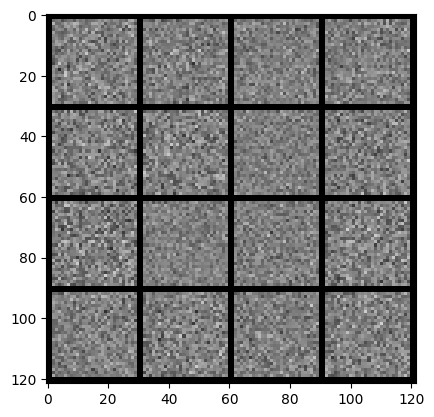

In [ ]:
x,y = next(iter(dataloader))
print(x.shape)
print(y.shape)
print(y[:10])

noise = gen_noise(batch_size,z_dim)
fake = gen(noise)
show(fake)

In [ ]:
# Calculating the loss

# generator loss
def calc_gen_loss(loss_func,gen,disc,number,z_dim):
  noise = gen_noise(number,z_dim)
  fake = gen(noise)
  pred = disc(fake)
  targets = torch.ones_like(pred)

  gen_loss = loss_func(pred,targets)

  return gen_loss

def calc_disc_loss(loss_func,gen,disc,number,real,z_dim):
  noise = gen_noise(number,z_dim)
  fake = gen(noise)
  disc_fake = disc(fake.detach())
  disc_fake_targets = torch.zeros_like(disc_fake)
  disc_fake_loss = loss_func(disc_fake,disc_fake_targets)

  disc_real = disc(real.detach())
  disc_real_targets = torch.ones_like(disc_real)
  disc_real_loss = loss_func(disc_real,disc_real_targets)

  disc_loss = (disc_fake_loss+disc_real_loss)/2

  return disc_loss

  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 0| step: 100500 Gen Loss : 1.9227546691894515 | Disc Loss : 0.3631203068296115
Epoch: 0| step: 100800 Gen Loss : 1.8657079895337432 | Disc Loss : 0.3750344122449555


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 1| step: 101100 Gen Loss : 1.8961571315924324 | Disc Loss : 0.3695696922143302


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 2| step: 101400 Gen Loss : 1.850124309857687 | Disc Loss : 0.3720309492945668
Epoch: 2| step: 101700 Gen Loss : 1.8431715162595108 | Disc Loss : 0.3751660711566605


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 3| step: 102000 Gen Loss : 1.8517725912729897 | Disc Loss : 0.37049921363592153


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 4| step: 102300 Gen Loss : 1.8505625911553707 | Disc Loss : 0.37477561930815423
Epoch: 4| step: 102600 Gen Loss : 1.8618797171115866 | Disc Loss : 0.3707782545685766


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 5| step: 102900 Gen Loss : 1.8684889789422352 | Disc Loss : 0.37529460251331337


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 6| step: 103200 Gen Loss : 1.8501152952512108 | Disc Loss : 0.376972737411658


<ipython-input-101-9caffdc1594d>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(5,5))


Epoch: 6| step: 103500 Gen Loss : 1.8783298246065774 | Disc Loss : 0.3717172065377235


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 7| step: 103800 Gen Loss : 1.8844078818957022 | Disc Loss : 0.37114912023146984
Epoch: 7| step: 104100 Gen Loss : 1.859328160285949 | Disc Loss : 0.3713651493191717


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 8| step: 104400 Gen Loss : 1.8187290008862818 | Disc Loss : 0.37492028335730265


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 9| step: 104700 Gen Loss : 1.8441609863440203 | Disc Loss : 0.3689905884861948
Epoch: 9| step: 105000 Gen Loss : 1.8417074465751653 | Disc Loss : 0.3727897390723231


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 10| step: 105300 Gen Loss : 1.8630373032887766 | Disc Loss : 0.37173558960358294


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 11| step: 105600 Gen Loss : 1.8601454365253445 | Disc Loss : 0.3738885599374772
Epoch: 11| step: 105900 Gen Loss : 1.8876070253054298 | Disc Loss : 0.37246180941661206


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 12| step: 106200 Gen Loss : 1.8637719488143925 | Disc Loss : 0.37038992335399007


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 13| step: 106500 Gen Loss : 1.8383361562093108 | Disc Loss : 0.3797794597347581
Epoch: 13| step: 106800 Gen Loss : 1.8461268969376887 | Disc Loss : 0.36945312410593023


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 14| step: 107100 Gen Loss : 1.8825209196408577 | Disc Loss : 0.3687377028663954
Epoch: 14| step: 107400 Gen Loss : 1.8802718563874543 | Disc Loss : 0.37193132946888596


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 15| step: 107700 Gen Loss : 1.8606591411431637 | Disc Loss : 0.3667593693733216


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 16| step: 108000 Gen Loss : 1.82545051018397 | Disc Loss : 0.3750625914335251
Epoch: 16| step: 108300 Gen Loss : 1.8695554665724439 | Disc Loss : 0.3711770878235501


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 17| step: 108600 Gen Loss : 1.8462393796443939 | Disc Loss : 0.3654609556992849


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 18| step: 108900 Gen Loss : 1.88207600315412 | Disc Loss : 0.3690491866072019
Epoch: 18| step: 109200 Gen Loss : 1.8911600347359985 | Disc Loss : 0.3635570463538171


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 19| step: 109500 Gen Loss : 1.869344251950581 | Disc Loss : 0.36638227780660004


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 20| step: 109800 Gen Loss : 1.869461042483647 | Disc Loss : 0.362747889459133
Epoch: 20| step: 110100 Gen Loss : 1.8890504542986548 | Disc Loss : 0.366577627360821


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 21| step: 110400 Gen Loss : 1.8730229914188394 | Disc Loss : 0.36902830680211396


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 22| step: 110700 Gen Loss : 1.8778648630777992 | Disc Loss : 0.3651651737590634
Epoch: 22| step: 111000 Gen Loss : 1.8766231759389236 | Disc Loss : 0.36989049613475816


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 23| step: 111300 Gen Loss : 1.8695898822943375 | Disc Loss : 0.3704460156957307
Epoch: 23| step: 111600 Gen Loss : 1.8664313868681586 | Disc Loss : 0.3696144035458566


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 24| step: 111900 Gen Loss : 1.868630388180414 | Disc Loss : 0.36616284579038577


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 25| step: 112200 Gen Loss : 1.8855548365910855 | Disc Loss : 0.3655523032943408
Epoch: 25| step: 112500 Gen Loss : 1.893026493787764 | Disc Loss : 0.3646455053985119


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 26| step: 112800 Gen Loss : 1.8926077051957453 | Disc Loss : 0.3627662337819733


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 27| step: 113100 Gen Loss : 1.8791449896494532 | Disc Loss : 0.3644771273930867
Epoch: 27| step: 113400 Gen Loss : 1.900872706572216 | Disc Loss : 0.3620671856403349


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 28| step: 113700 Gen Loss : 1.8576361632347114 | Disc Loss : 0.36173577825228387


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 29| step: 114000 Gen Loss : 1.8657718678315465 | Disc Loss : 0.3616506425539651
Epoch: 29| step: 114300 Gen Loss : 1.9167859570185346 | Disc Loss : 0.36121308277050634


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 30| step: 114600 Gen Loss : 1.886169695059458 | Disc Loss : 0.3588434769709905
Epoch: 30| step: 114900 Gen Loss : 1.8912058484554273 | Disc Loss : 0.3615071259935698


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 31| step: 115200 Gen Loss : 1.9356255022684732 | Disc Loss : 0.3656642926732701


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 32| step: 115500 Gen Loss : 1.8986815989017491 | Disc Loss : 0.3616552215814587
Epoch: 32| step: 115800 Gen Loss : 1.8643832163015996 | Disc Loss : 0.36226413249969464


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 33| step: 116100 Gen Loss : 1.8838214965661377 | Disc Loss : 0.3584500017762183


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 34| step: 116400 Gen Loss : 1.880553367137908 | Disc Loss : 0.36141538406411816
Epoch: 34| step: 116700 Gen Loss : 1.9380189998944604 | Disc Loss : 0.34873617410659785


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 35| step: 117000 Gen Loss : 1.94118958592415 | Disc Loss : 0.35906199355920193


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 36| step: 117300 Gen Loss : 1.912442922989528 | Disc Loss : 0.3537231330076855
Epoch: 36| step: 117600 Gen Loss : 1.9364666438102713 | Disc Loss : 0.3506647899746895


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 37| step: 117900 Gen Loss : 1.887041328748066 | Disc Loss : 0.35937650521596265
Epoch: 37| step: 118200 Gen Loss : 1.9344661943117771 | Disc Loss : 0.35316926240921004


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 38| step: 118500 Gen Loss : 1.967105379104614 | Disc Loss : 0.3478776342670123


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 39| step: 118800 Gen Loss : 1.902432642777761 | Disc Loss : 0.3575747325023015
Epoch: 39| step: 119100 Gen Loss : 1.9269346098105118 | Disc Loss : 0.34709650740027415


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 40| step: 119400 Gen Loss : 1.9446207388242094 | Disc Loss : 0.34679451152682306


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 41| step: 119700 Gen Loss : 1.9376448051134743 | Disc Loss : 0.34938177352150296
Epoch: 41| step: 120000 Gen Loss : 1.9634969913959515 | Disc Loss : 0.3421976065138973


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 42| step: 120300 Gen Loss : 1.9284660728772478 | Disc Loss : 0.3575674936672049


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 43| step: 120600 Gen Loss : 1.95893575668335 | Disc Loss : 0.35081411778926846
Epoch: 43| step: 120900 Gen Loss : 1.9639475309848775 | Disc Loss : 0.3452733669678369


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 44| step: 121200 Gen Loss : 1.9525153636932384 | Disc Loss : 0.3431252880891164


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 45| step: 121500 Gen Loss : 1.9735632248719532 | Disc Loss : 0.3460784253974756
Epoch: 45| step: 121800 Gen Loss : 1.9621489135424297 | Disc Loss : 0.34191029479106266


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 46| step: 122100 Gen Loss : 1.9505803410212208 | Disc Loss : 0.3386651609341304
Epoch: 46| step: 122400 Gen Loss : 1.9977719295024876 | Disc Loss : 0.34193725109100376


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 47| step: 122700 Gen Loss : 2.0199756038188936 | Disc Loss : 0.3334525674084823


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 48| step: 123000 Gen Loss : 1.9710621706644689 | Disc Loss : 0.34131234695514046
Epoch: 48| step: 123300 Gen Loss : 1.9799026052157085 | Disc Loss : 0.33857224057118096


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 49| step: 123600 Gen Loss : 1.9754975910981512 | Disc Loss : 0.3398666324218114


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 50| step: 123900 Gen Loss : 1.9500476018587745 | Disc Loss : 0.3461493856708209
Epoch: 50| step: 124200 Gen Loss : 1.9996885641415922 | Disc Loss : 0.3401454748213291


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 51| step: 124500 Gen Loss : 1.9729531912008906 | Disc Loss : 0.33901904940605193


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 52| step: 124800 Gen Loss : 1.9859580608208982 | Disc Loss : 0.3422599081695083
Epoch: 52| step: 125100 Gen Loss : 2.0262543010711678 | Disc Loss : 0.3309715936084588


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 53| step: 125400 Gen Loss : 2.0222029968102775 | Disc Loss : 0.3285739839573703
Epoch: 53| step: 125700 Gen Loss : 1.9791827829678854 | Disc Loss : 0.33954958106080696


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 54| step: 126000 Gen Loss : 2.0390567851066588 | Disc Loss : 0.3280051360527677


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 55| step: 126300 Gen Loss : 2.0098628731568655 | Disc Loss : 0.33688890665769566
Epoch: 55| step: 126600 Gen Loss : 2.0011269462108623 | Disc Loss : 0.33465069035689027


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 56| step: 126900 Gen Loss : 2.014410612980524 | Disc Loss : 0.334735466192166


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 57| step: 127200 Gen Loss : 2.0062795484066007 | Disc Loss : 0.3330368387202422
Epoch: 57| step: 127500 Gen Loss : 2.028354037602743 | Disc Loss : 0.3364135313530763


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 58| step: 127800 Gen Loss : 2.00321520249049 | Disc Loss : 0.3279055079817774


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 59| step: 128100 Gen Loss : 2.025891242822011 | Disc Loss : 0.32825967535376543
Epoch: 59| step: 128400 Gen Loss : 2.028850201368333 | Disc Loss : 0.33441987633705145


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 60| step: 128700 Gen Loss : 2.0432093103726694 | Disc Loss : 0.3309227895239988


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 61| step: 129000 Gen Loss : 2.0329425688584633 | Disc Loss : 0.33253047386805223
Epoch: 61| step: 129300 Gen Loss : 2.0631114399433135 | Disc Loss : 0.32470646917819973


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 62| step: 129600 Gen Loss : 2.0548212500413263 | Disc Loss : 0.3245400045812128
Epoch: 62| step: 129900 Gen Loss : 2.03315171678861 | Disc Loss : 0.3312322983145715


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 63| step: 130200 Gen Loss : 2.073690413236618 | Disc Loss : 0.3210984862347445


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 64| step: 130500 Gen Loss : 2.0576226437091827 | Disc Loss : 0.32284338543812435
Epoch: 64| step: 130800 Gen Loss : 2.066594372987749 | Disc Loss : 0.32148300508658073


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 65| step: 131100 Gen Loss : 2.081369370222093 | Disc Loss : 0.323883160005013


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 66| step: 131400 Gen Loss : 2.029015593528749 | Disc Loss : 0.322845542083184
Epoch: 66| step: 131700 Gen Loss : 2.0653921171029417 | Disc Loss : 0.3209585326910016


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 67| step: 132000 Gen Loss : 2.093152203162512 | Disc Loss : 0.31712701499462137


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 68| step: 132300 Gen Loss : 2.079219636122385 | Disc Loss : 0.32562072118123353
Epoch: 68| step: 132600 Gen Loss : 2.1004005134105697 | Disc Loss : 0.3176297893623511


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 69| step: 132900 Gen Loss : 2.073890389204026 | Disc Loss : 0.3149752055108551
Epoch: 69| step: 133200 Gen Loss : 2.070529649655025 | Disc Loss : 0.31995991850892697


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 70| step: 133500 Gen Loss : 2.12454987804095 | Disc Loss : 0.3085330274204414


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 71| step: 133800 Gen Loss : 2.117671958208084 | Disc Loss : 0.310462561349074
Epoch: 71| step: 134100 Gen Loss : 2.0916395731767023 | Disc Loss : 0.3163303654889265


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 72| step: 134400 Gen Loss : 2.116698696613314 | Disc Loss : 0.30834088340401633


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 73| step: 134700 Gen Loss : 2.0869073255856834 | Disc Loss : 0.31446141744653405
Epoch: 73| step: 135000 Gen Loss : 2.073261775970458 | Disc Loss : 0.31982478042443563


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 74| step: 135300 Gen Loss : 2.089377232392628 | Disc Loss : 0.31920453553398437


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 75| step: 135600 Gen Loss : 2.0716807341575634 | Disc Loss : 0.31930447742342954
Epoch: 75| step: 135900 Gen Loss : 2.12669601360957 | Disc Loss : 0.3089269944528741


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 76| step: 136200 Gen Loss : 2.088961840073267 | Disc Loss : 0.3141148793200653


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 77| step: 136500 Gen Loss : 2.0805011832714073 | Disc Loss : 0.3232731687029201
Epoch: 77| step: 136800 Gen Loss : 2.112509646813075 | Disc Loss : 0.30900554900368044


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 78| step: 137100 Gen Loss : 2.111597560246785 | Disc Loss : 0.3106680622696879
Epoch: 78| step: 137400 Gen Loss : 2.1032195532321936 | Disc Loss : 0.3180635927120843


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 79| step: 137700 Gen Loss : 2.1029916373888655 | Disc Loss : 0.31031626239418997


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 80| step: 138000 Gen Loss : 2.1056141992410025 | Disc Loss : 0.3116155437628426
Epoch: 80| step: 138300 Gen Loss : 2.1052258805433905 | Disc Loss : 0.3138040973742802


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 81| step: 138600 Gen Loss : 2.14071168144544 | Disc Loss : 0.3084731953342758


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 82| step: 138900 Gen Loss : 2.1117096658547703 | Disc Loss : 0.3084935153524082
Epoch: 82| step: 139200 Gen Loss : 2.1492111186186484 | Disc Loss : 0.3066053851445516


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 83| step: 139500 Gen Loss : 2.1534759124120093 | Disc Loss : 0.3065561763445537


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 84| step: 139800 Gen Loss : 2.1383628646532697 | Disc Loss : 0.30441391120354355
Epoch: 84| step: 140100 Gen Loss : 2.193668886820474 | Disc Loss : 0.29905063430468243


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 85| step: 140400 Gen Loss : 2.150219482183456 | Disc Loss : 0.3080160743494831
Epoch: 85| step: 140700 Gen Loss : 2.123967161178588 | Disc Loss : 0.31153602465987207


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 86| step: 141000 Gen Loss : 2.1234698780377705 | Disc Loss : 0.3061747415860495


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 87| step: 141300 Gen Loss : 2.1399934442838022 | Disc Loss : 0.30315049101908964
Epoch: 87| step: 141600 Gen Loss : 2.1899086364110314 | Disc Loss : 0.29821180775761597


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 88| step: 141900 Gen Loss : 2.1404435110092157 | Disc Loss : 0.30000107506910967


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 89| step: 142200 Gen Loss : 2.14504015962283 | Disc Loss : 0.3083923429747423
Epoch: 89| step: 142500 Gen Loss : 2.183043999274572 | Disc Loss : 0.3006051005919776


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 90| step: 142800 Gen Loss : 2.1757325466473896 | Disc Loss : 0.297356615960598


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 91| step: 143100 Gen Loss : 2.2070996880531313 | Disc Loss : 0.2925922642151514
Epoch: 91| step: 143400 Gen Loss : 2.1862048427263896 | Disc Loss : 0.2983179487287999


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 92| step: 143700 Gen Loss : 2.193167992830275 | Disc Loss : 0.29238866001367575


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 93| step: 144000 Gen Loss : 2.1818521650632223 | Disc Loss : 0.3025185306866964
Epoch: 93| step: 144300 Gen Loss : 2.210094941854477 | Disc Loss : 0.29239513839284575


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 94| step: 144600 Gen Loss : 2.1701840917269384 | Disc Loss : 0.29131845201055223
Epoch: 94| step: 144900 Gen Loss : 2.217220098574956 | Disc Loss : 0.28964643006523444


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 95| step: 145200 Gen Loss : 2.209860111872355 | Disc Loss : 0.28611606160799646


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 96| step: 145500 Gen Loss : 2.204609905878704 | Disc Loss : 0.2938650384545326
Epoch: 96| step: 145800 Gen Loss : 2.1951403605937965 | Disc Loss : 0.2952741368114949


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 97| step: 146100 Gen Loss : 2.218896477619806 | Disc Loss : 0.29812870388229684


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 98| step: 146400 Gen Loss : 2.212965077956516 | Disc Loss : 0.2941764955719311
Epoch: 98| step: 146700 Gen Loss : 2.2274275982379925 | Disc Loss : 0.2949349697430931


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 99| step: 147000 Gen Loss : 2.223268632491429 | Disc Loss : 0.29070241476098696


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 100| step: 147300 Gen Loss : 2.2219422876834862 | Disc Loss : 0.28727851808071114
Epoch: 100| step: 147600 Gen Loss : 2.233010715643564 | Disc Loss : 0.2951256337265174


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 101| step: 147900 Gen Loss : 2.2241492728392287 | Disc Loss : 0.2883342092235886
Epoch: 101| step: 148200 Gen Loss : 2.2480179381370538 | Disc Loss : 0.2833387327690918


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 102| step: 148500 Gen Loss : 2.2341639693578084 | Disc Loss : 0.28938792159159965


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 103| step: 148800 Gen Loss : 2.2199703737099954 | Disc Loss : 0.28446484024326
Epoch: 103| step: 149100 Gen Loss : 2.2671326410770405 | Disc Loss : 0.286494158655405


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 104| step: 149400 Gen Loss : 2.231883031924566 | Disc Loss : 0.28766506652037316


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 105| step: 149700 Gen Loss : 2.236689453124998 | Disc Loss : 0.2864264996349813
Epoch: 105| step: 150000 Gen Loss : 2.284484812418619 | Disc Loss : 0.2822062504291534


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 106| step: 150300 Gen Loss : 2.2412783773740124 | Disc Loss : 0.2971368823448818


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 107| step: 150600 Gen Loss : 2.2469667422771473 | Disc Loss : 0.2858938649793466
Epoch: 107| step: 150900 Gen Loss : 2.289693718353905 | Disc Loss : 0.2866750306387743


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 108| step: 151200 Gen Loss : 2.2737356619040177 | Disc Loss : 0.2797850961983203
Epoch: 108| step: 151500 Gen Loss : 2.2559823342164353 | Disc Loss : 0.28158334717154526


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 109| step: 151800 Gen Loss : 2.2935893321037293 | Disc Loss : 0.26910296455025684


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 110| step: 152100 Gen Loss : 2.2577906584739686 | Disc Loss : 0.2818543043235937
Epoch: 110| step: 152400 Gen Loss : 2.2689953251679733 | Disc Loss : 0.27853924488027915


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 111| step: 152700 Gen Loss : 2.2897088464101136 | Disc Loss : 0.2803016106287638


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 112| step: 153000 Gen Loss : 2.284097376267116 | Disc Loss : 0.27931694363554316
Epoch: 112| step: 153300 Gen Loss : 2.3041272155443826 | Disc Loss : 0.28346194272240005


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 113| step: 153600 Gen Loss : 2.293631658951442 | Disc Loss : 0.2795357823371886


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 114| step: 153900 Gen Loss : 2.2812193071842195 | Disc Loss : 0.2793536335726579
Epoch: 114| step: 154200 Gen Loss : 2.2992846043904605 | Disc Loss : 0.2756291258335112


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 115| step: 154500 Gen Loss : 2.3039007584253945 | Disc Loss : 0.2746688944101334


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 116| step: 154800 Gen Loss : 2.279755121469498 | Disc Loss : 0.2745025137563547
Epoch: 116| step: 155100 Gen Loss : 2.3241756212711326 | Disc Loss : 0.2731955539186795


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 117| step: 155400 Gen Loss : 2.297967842817308 | Disc Loss : 0.2724427064756552
Epoch: 117| step: 155700 Gen Loss : 2.3474704762299856 | Disc Loss : 0.26680553997556383


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 118| step: 156000 Gen Loss : 2.32624998410543 | Disc Loss : 0.2723002811272939


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 119| step: 156300 Gen Loss : 2.2917072693506864 | Disc Loss : 0.2785718987882138
Epoch: 119| step: 156600 Gen Loss : 2.3036914873123173 | Disc Loss : 0.27576802680889784


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 120| step: 156900 Gen Loss : 2.336454312801363 | Disc Loss : 0.2724544690052667


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 121| step: 157200 Gen Loss : 2.310290399789809 | Disc Loss : 0.2723903054992361
Epoch: 121| step: 157500 Gen Loss : 2.349233012994128 | Disc Loss : 0.2710980581740538


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 122| step: 157800 Gen Loss : 2.341729706923168 | Disc Loss : 0.27082774097720785


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 123| step: 158100 Gen Loss : 2.3115217789014197 | Disc Loss : 0.2728912560641764
Epoch: 123| step: 158400 Gen Loss : 2.328036233584085 | Disc Loss : 0.2736232561369737


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 124| step: 158700 Gen Loss : 2.320120885372163 | Disc Loss : 0.26924323886632917
Epoch: 124| step: 159000 Gen Loss : 2.3372806787490856 | Disc Loss : 0.26836724748214097


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 125| step: 159300 Gen Loss : 2.343964564800264 | Disc Loss : 0.2656482474505902


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 126| step: 159600 Gen Loss : 2.344805961052578 | Disc Loss : 0.2712276482085386
Epoch: 126| step: 159900 Gen Loss : 2.33183602611224 | Disc Loss : 0.2725263853867848


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 127| step: 160200 Gen Loss : 2.3459746122360228 | Disc Loss : 0.27005468989411974


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 128| step: 160500 Gen Loss : 2.3451058709621435 | Disc Loss : 0.26685462579131136
Epoch: 128| step: 160800 Gen Loss : 2.382747809092203 | Disc Loss : 0.2625390063722927


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 129| step: 161100 Gen Loss : 2.379962468544642 | Disc Loss : 0.260933393885692


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 130| step: 161400 Gen Loss : 2.343202002445858 | Disc Loss : 0.26868578275044736
Epoch: 130| step: 161700 Gen Loss : 2.410534114042917 | Disc Loss : 0.25983142837882045


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 131| step: 162000 Gen Loss : 2.3893898860613514 | Disc Loss : 0.25596802910168986


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 132| step: 162300 Gen Loss : 2.371426165103913 | Disc Loss : 0.2628147059679032
Epoch: 132| step: 162600 Gen Loss : 2.393688588142394 | Disc Loss : 0.2616486667593321


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 133| step: 162900 Gen Loss : 2.3530642501513164 | Disc Loss : 0.26172982285420104
Epoch: 133| step: 163200 Gen Loss : 2.3835927812258397 | Disc Loss : 0.2621392338474588


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 134| step: 163500 Gen Loss : 2.4045527001221965 | Disc Loss : 0.26229268829027835


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 135| step: 163800 Gen Loss : 2.401619231700897 | Disc Loss : 0.26235949014623955
Epoch: 135| step: 164100 Gen Loss : 2.3783367168903347 | Disc Loss : 0.2623211786150932


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 136| step: 164400 Gen Loss : 2.4024185101191193 | Disc Loss : 0.2577309962610405


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 137| step: 164700 Gen Loss : 2.4153048328558593 | Disc Loss : 0.2571733789642649
Epoch: 137| step: 165000 Gen Loss : 2.4053426774342856 | Disc Loss : 0.25502322206894557


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 138| step: 165300 Gen Loss : 2.374763878186544 | Disc Loss : 0.25919959783554075


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 139| step: 165600 Gen Loss : 2.3960466261704747 | Disc Loss : 0.2553794509669145
Epoch: 139| step: 165900 Gen Loss : 2.4337374242146823 | Disc Loss : 0.2512695834537346


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 140| step: 166200 Gen Loss : 2.4028646783034024 | Disc Loss : 0.2505323458214599
Epoch: 140| step: 166500 Gen Loss : 2.4234957126776377 | Disc Loss : 0.2481533894936243


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 141| step: 166800 Gen Loss : 2.426582607030867 | Disc Loss : 0.2546516438325247


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 142| step: 167100 Gen Loss : 2.3814807236194615 | Disc Loss : 0.25730921645959215
Epoch: 142| step: 167400 Gen Loss : 2.440985432068509 | Disc Loss : 0.2497138552864392


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 143| step: 167700 Gen Loss : 2.442828826109569 | Disc Loss : 0.25325766737262423


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 144| step: 168000 Gen Loss : 2.420254895289739 | Disc Loss : 0.2530457495649657
Epoch: 144| step: 168300 Gen Loss : 2.437262420256932 | Disc Loss : 0.2543611138065656


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 145| step: 168600 Gen Loss : 2.4666316151618966 | Disc Loss : 0.24408017173409466


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 146| step: 168900 Gen Loss : 2.454495452245077 | Disc Loss : 0.2528984026114145
Epoch: 146| step: 169200 Gen Loss : 2.4311069194475805 | Disc Loss : 0.25068781152367586


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 147| step: 169500 Gen Loss : 2.453419216871263 | Disc Loss : 0.24757296492656078


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 148| step: 169800 Gen Loss : 2.417832781076433 | Disc Loss : 0.2544819563130536
Epoch: 148| step: 170100 Gen Loss : 2.4534397582213097 | Disc Loss : 0.2513086425264678


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 149| step: 170400 Gen Loss : 2.434368260304134 | Disc Loss : 0.252828551431497
Epoch: 149| step: 170700 Gen Loss : 2.4291567893822994 | Disc Loss : 0.25353269115090377


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 150| step: 171000 Gen Loss : 2.479597727060318 | Disc Loss : 0.24449103300770125


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 151| step: 171300 Gen Loss : 2.4560044984022786 | Disc Loss : 0.24778678933779397
Epoch: 151| step: 171600 Gen Loss : 2.4930413607756297 | Disc Loss : 0.2485562357803185


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 152| step: 171900 Gen Loss : 2.440743241310119 | Disc Loss : 0.24468421106537172


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 153| step: 172200 Gen Loss : 2.470680437088012 | Disc Loss : 0.24776661718885098
Epoch: 153| step: 172500 Gen Loss : 2.471367398500444 | Disc Loss : 0.24212074006597187


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 154| step: 172800 Gen Loss : 2.4889128390947977 | Disc Loss : 0.24396265029907235


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 155| step: 173100 Gen Loss : 2.446999534368513 | Disc Loss : 0.25434477567672725
Epoch: 155| step: 173400 Gen Loss : 2.465509452819825 | Disc Loss : 0.25359074890613553


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 156| step: 173700 Gen Loss : 2.4668385219573987 | Disc Loss : 0.2469831537206968
Epoch: 156| step: 174000 Gen Loss : 2.502774183352789 | Disc Loss : 0.2450287662446498


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 157| step: 174300 Gen Loss : 2.5019461568196597 | Disc Loss : 0.24468715573350583


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 158| step: 174600 Gen Loss : 2.4867351472377774 | Disc Loss : 0.24027414609988534
Epoch: 158| step: 174900 Gen Loss : 2.5131537723541246 | Disc Loss : 0.24513800849517187


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 159| step: 175200 Gen Loss : 2.489202273686728 | Disc Loss : 0.24381990825136513


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 160| step: 175500 Gen Loss : 2.511673591931659 | Disc Loss : 0.23823559547464038
Epoch: 160| step: 175800 Gen Loss : 2.5080339097976694 | Disc Loss : 0.24128032694260282


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 161| step: 176100 Gen Loss : 2.503495109081267 | Disc Loss : 0.23802916948994


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 162| step: 176400 Gen Loss : 2.5093252766132337 | Disc Loss : 0.2387158991396427
Epoch: 162| step: 176700 Gen Loss : 2.547477732896801 | Disc Loss : 0.23301436841487874


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 163| step: 177000 Gen Loss : 2.5154774057865135 | Disc Loss : 0.24212297315398856


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 164| step: 177300 Gen Loss : 2.49731699069341 | Disc Loss : 0.25143589735031135
Epoch: 164| step: 177600 Gen Loss : 2.5243789041042324 | Disc Loss : 0.23782680734992045


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 165| step: 177900 Gen Loss : 2.5301667547225954 | Disc Loss : 0.24735638995965317
Epoch: 165| step: 178200 Gen Loss : 2.5296973530451448 | Disc Loss : 0.24188386966784794


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 166| step: 178500 Gen Loss : 2.5246684698263815 | Disc Loss : 0.23439570953448613


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 167| step: 178800 Gen Loss : 2.551866625150045 | Disc Loss : 0.23958653499682744
Epoch: 167| step: 179100 Gen Loss : 2.5439513703187306 | Disc Loss : 0.2382430947323641


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 168| step: 179400 Gen Loss : 2.517293581962586 | Disc Loss : 0.23645309408505746


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 169| step: 179700 Gen Loss : 2.5485566989580795 | Disc Loss : 0.2347916139165561
Epoch: 169| step: 180000 Gen Loss : 2.570351074139276 | Disc Loss : 0.22726861660679182


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 170| step: 180300 Gen Loss : 2.5696159497896813 | Disc Loss : 0.2305232748885949


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 171| step: 180600 Gen Loss : 2.5286928713321704 | Disc Loss : 0.23506803522507352
Epoch: 171| step: 180900 Gen Loss : 2.559589503606161 | Disc Loss : 0.2337443681061268


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 172| step: 181200 Gen Loss : 2.5707537535826352 | Disc Loss : 0.22892812108000118
Epoch: 172| step: 181500 Gen Loss : 2.503858273029327 | Disc Loss : 0.24136846636732412


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 173| step: 181800 Gen Loss : 2.551932635307312 | Disc Loss : 0.23395497168103863


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 174| step: 182100 Gen Loss : 2.53787612358729 | Disc Loss : 0.2413018854955831
Epoch: 174| step: 182400 Gen Loss : 2.538002552191415 | Disc Loss : 0.23944108481208493


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 175| step: 182700 Gen Loss : 2.5910388839244813 | Disc Loss : 0.2319817771762608


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 176| step: 183000 Gen Loss : 2.539853494167329 | Disc Loss : 0.23391070336103442
Epoch: 176| step: 183300 Gen Loss : 2.5859055578708645 | Disc Loss : 0.22947195077935845


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 177| step: 183600 Gen Loss : 2.58884707291921 | Disc Loss : 0.23092687671383208


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 178| step: 183900 Gen Loss : 2.5846454342206333 | Disc Loss : 0.22682251945137982
Epoch: 178| step: 184200 Gen Loss : 2.614776810010274 | Disc Loss : 0.2312605668604375


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 179| step: 184500 Gen Loss : 2.5734786526362106 | Disc Loss : 0.2293469266593457
Epoch: 179| step: 184800 Gen Loss : 2.600374004443487 | Disc Loss : 0.22399596547087036


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 180| step: 185100 Gen Loss : 2.5920263377825417 | Disc Loss : 0.22986814220746365


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 181| step: 185400 Gen Loss : 2.581950421730679 | Disc Loss : 0.22876076499621079
Epoch: 181| step: 185700 Gen Loss : 2.597597372531893 | Disc Loss : 0.23086697007218993


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 182| step: 186000 Gen Loss : 2.6135923683643334 | Disc Loss : 0.22679987991849584


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 183| step: 186300 Gen Loss : 2.6022354316711414 | Disc Loss : 0.2340110442539057
Epoch: 183| step: 186600 Gen Loss : 2.565370594660441 | Disc Loss : 0.2326847011844316


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 184| step: 186900 Gen Loss : 2.6280465567111957 | Disc Loss : 0.22777888660629594


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 185| step: 187200 Gen Loss : 2.61502292116483 | Disc Loss : 0.21994346549113591
Epoch: 185| step: 187500 Gen Loss : 2.651764380931855 | Disc Loss : 0.22605443273981413


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 186| step: 187800 Gen Loss : 2.61765996893247 | Disc Loss : 0.2247452383240064


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 187| step: 188100 Gen Loss : 2.6029206895828225 | Disc Loss : 0.23010221744577086
Epoch: 187| step: 188400 Gen Loss : 2.620382392009101 | Disc Loss : 0.22902330030997606


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 188| step: 188700 Gen Loss : 2.6101746106147745 | Disc Loss : 0.23023389836152383
Epoch: 188| step: 189000 Gen Loss : 2.6245248277982083 | Disc Loss : 0.22780675197641065


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 189| step: 189300 Gen Loss : 2.654492360750834 | Disc Loss : 0.2189800197382767


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 190| step: 189600 Gen Loss : 2.6243029642105085 | Disc Loss : 0.2224114849666753
Epoch: 190| step: 189900 Gen Loss : 2.656072831948598 | Disc Loss : 0.22603097771604846


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 191| step: 190200 Gen Loss : 2.6472742633024855 | Disc Loss : 0.2233364139000576


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 192| step: 190500 Gen Loss : 2.6291694259643554 | Disc Loss : 0.22025537768999742
Epoch: 192| step: 190800 Gen Loss : 2.6599987284342443 | Disc Loss : 0.22226080372929563


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 193| step: 191100 Gen Loss : 2.672583441734313 | Disc Loss : 0.22481879894932105


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 194| step: 191400 Gen Loss : 2.6356096533934283 | Disc Loss : 0.22726230291028812
Epoch: 194| step: 191700 Gen Loss : 2.664349925120671 | Disc Loss : 0.2195374521364768


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 195| step: 192000 Gen Loss : 2.6804499085744227 | Disc Loss : 0.2207107490301131
Epoch: 195| step: 192300 Gen Loss : 2.63624227086703 | Disc Loss : 0.22751158674558006


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 196| step: 192600 Gen Loss : 2.678364650011062 | Disc Loss : 0.2185065786043804


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 197| step: 192900 Gen Loss : 2.6691841840743997 | Disc Loss : 0.21876873565216853
Epoch: 197| step: 193200 Gen Loss : 2.679663128058116 | Disc Loss : 0.2178406864901384


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 198| step: 193500 Gen Loss : 2.6941991241772962 | Disc Loss : 0.22066758801539735


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 199| step: 193800 Gen Loss : 2.6669182896614068 | Disc Loss : 0.21609899473687003
Epoch: 199| step: 194100 Gen Loss : 2.69824614048004 | Disc Loss : 0.2152343038717906


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 200| step: 194400 Gen Loss : 2.6944422384103137 | Disc Loss : 0.21442784806092585


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 201| step: 194700 Gen Loss : 2.654234987099966 | Disc Loss : 0.21822505573431647
Epoch: 201| step: 195000 Gen Loss : 2.697134949366252 | Disc Loss : 0.21647532065709443


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 202| step: 195300 Gen Loss : 2.7026226611932125 | Disc Loss : 0.21295946761965737


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 203| step: 195600 Gen Loss : 2.6643604576587694 | Disc Loss : 0.21940910135706274
Epoch: 203| step: 195900 Gen Loss : 2.7019476294517513 | Disc Loss : 0.21231413473685573


  0%|          | 0/469 [00:00<?, ?it/s]

Epoch: 204| step: 196200 Gen Loss : 2.682857239643732 | Disc Loss : 0.2225138657788437
Epoch: 204| step: 196500 Gen Loss : 2.6868804128964743 | Disc Loss : 0.21498390843470888


  0%|          | 0/469 [00:00<?, ?it/s]

KeyboardInterrupt: 

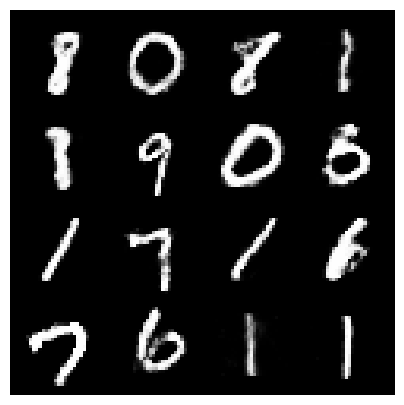

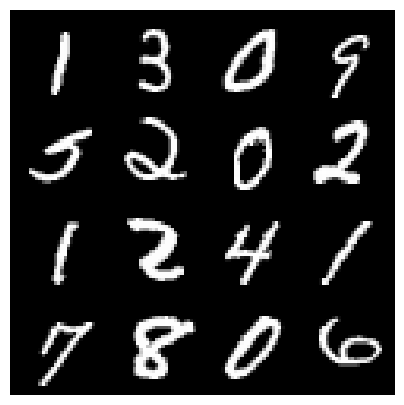

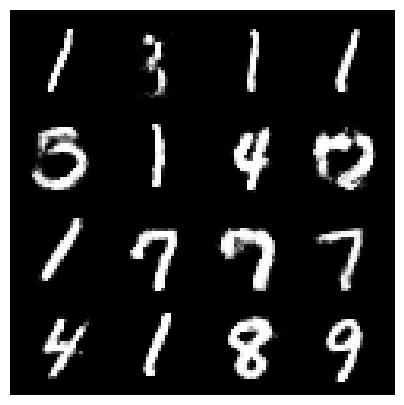

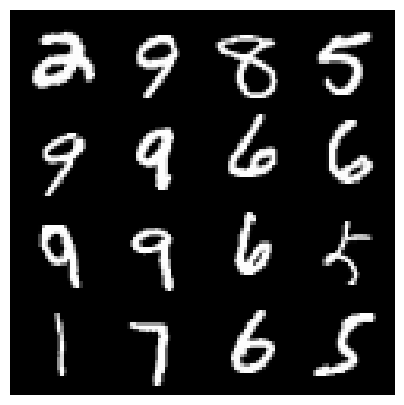

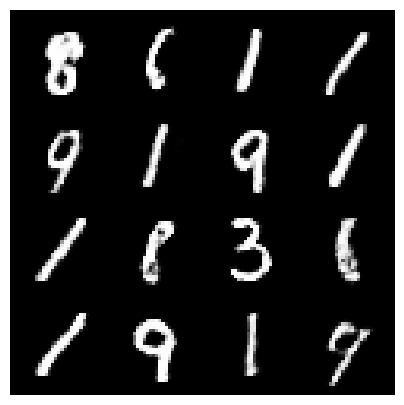

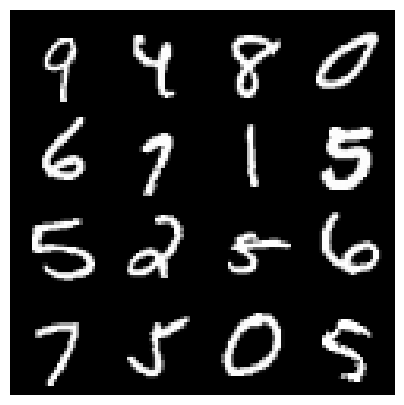

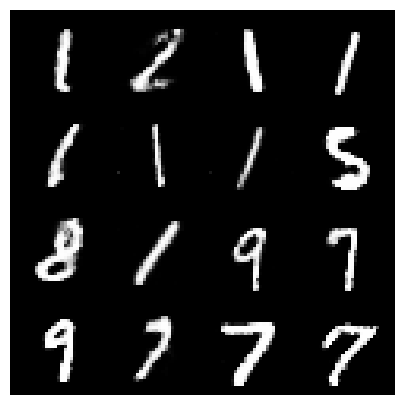

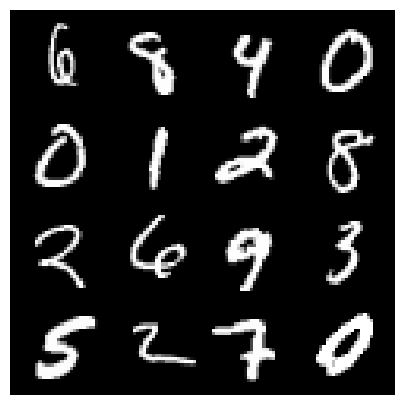

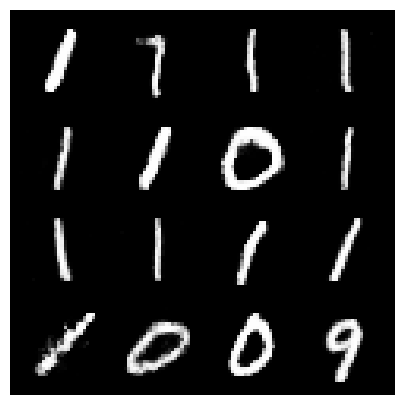

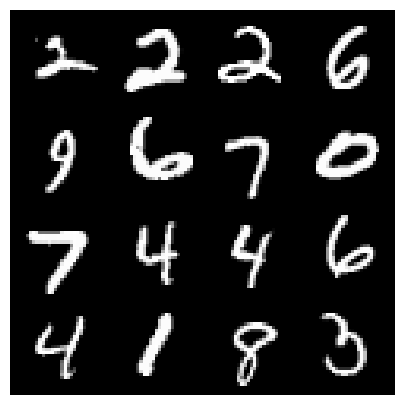

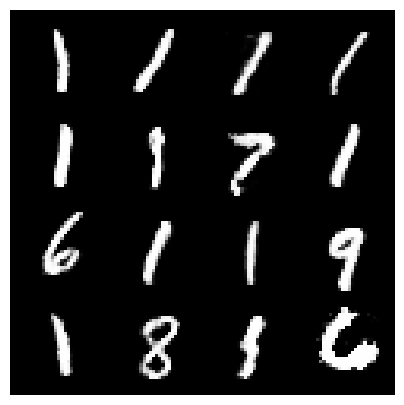

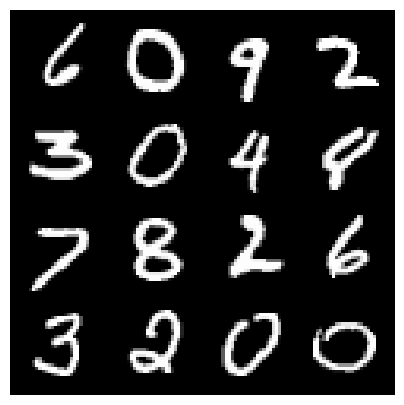

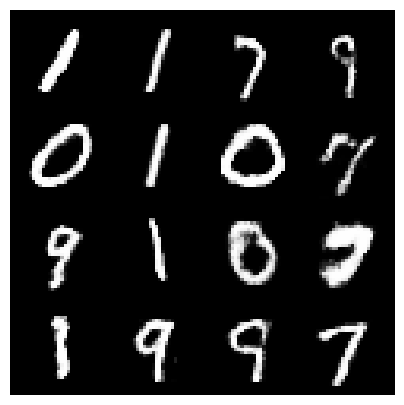

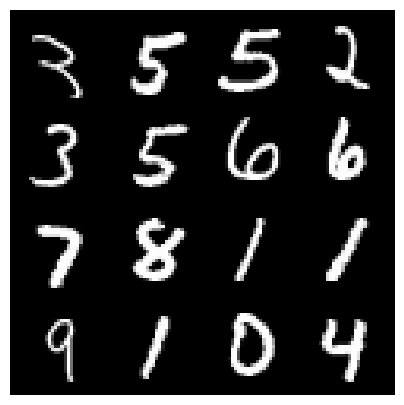

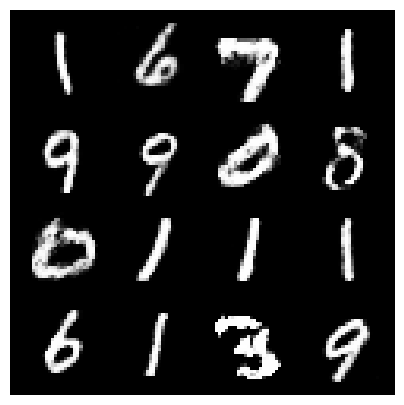

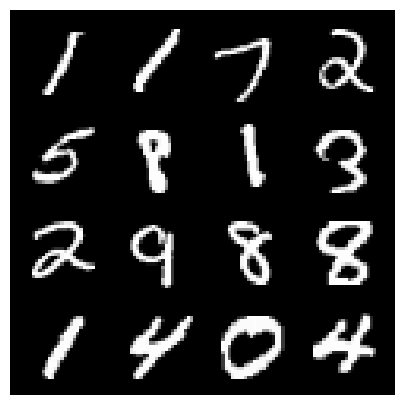

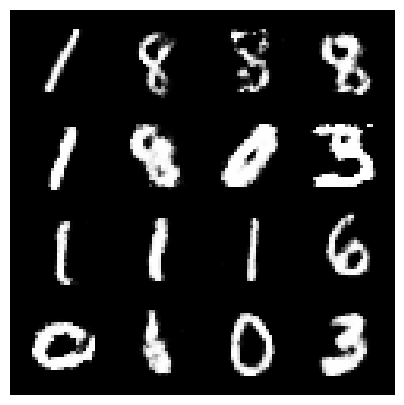

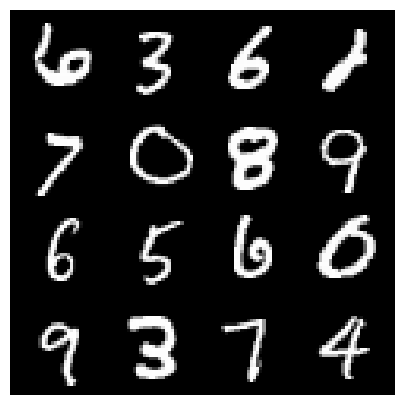

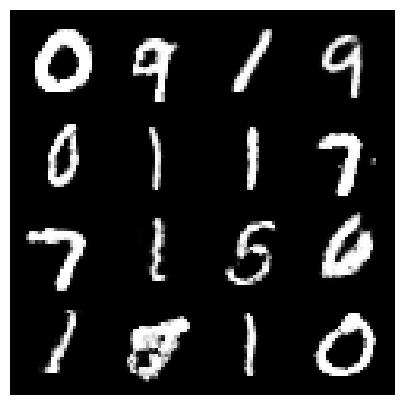

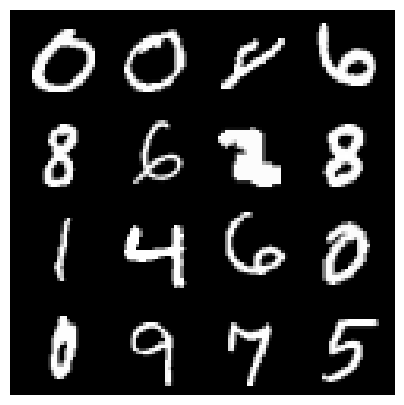

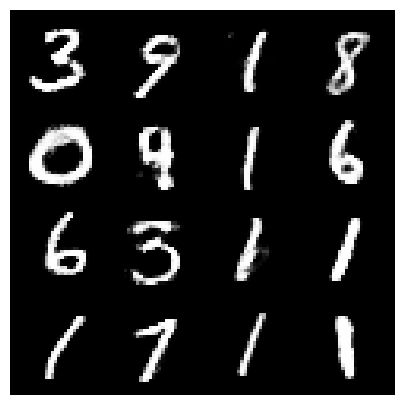

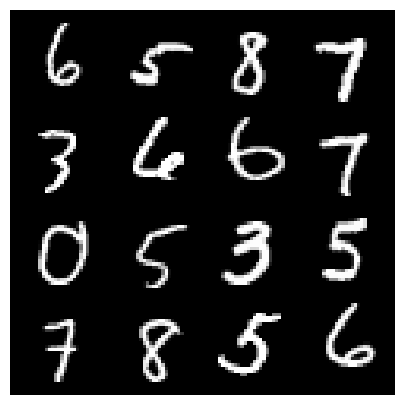

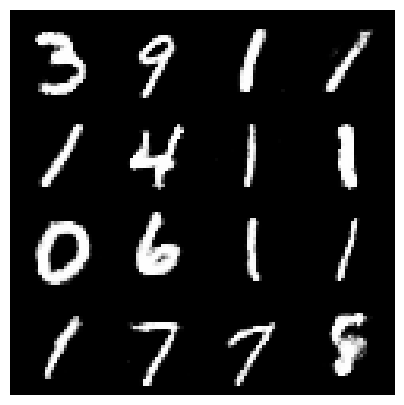

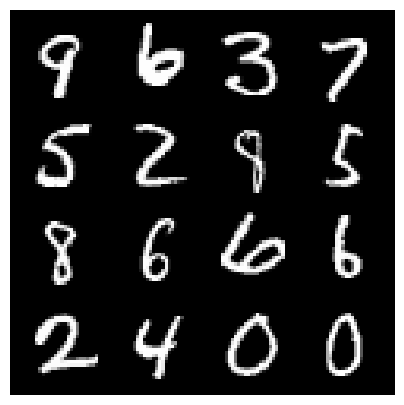

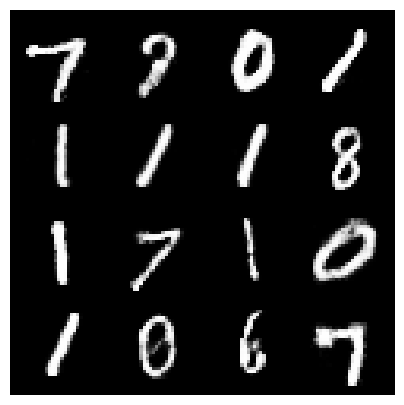

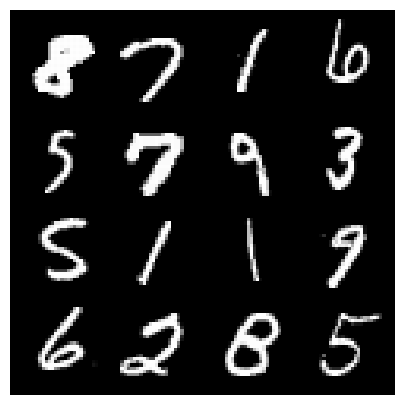

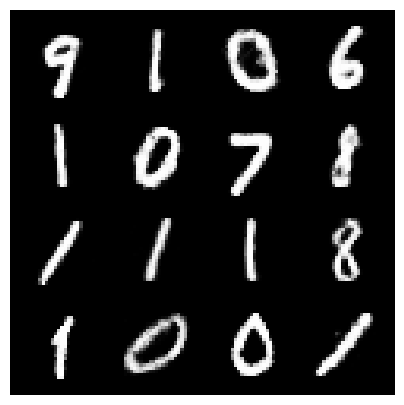

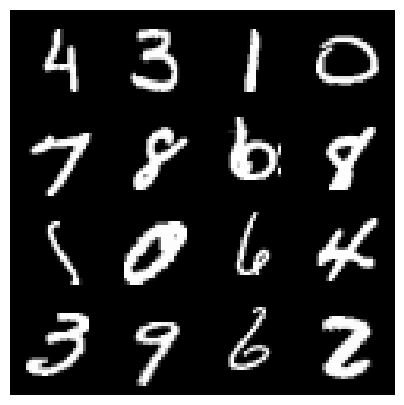

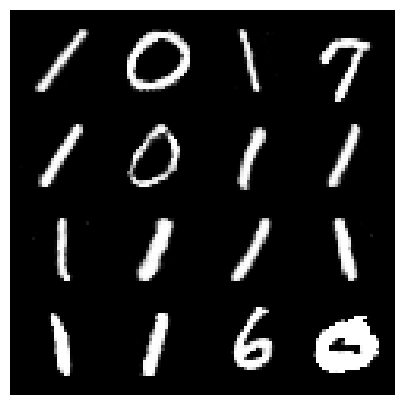

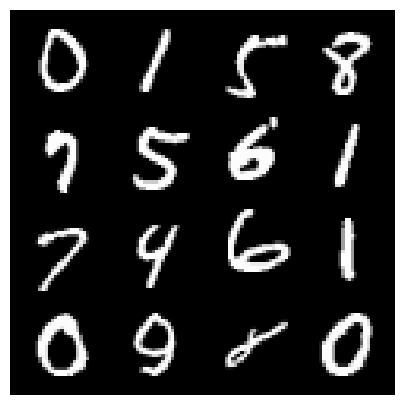

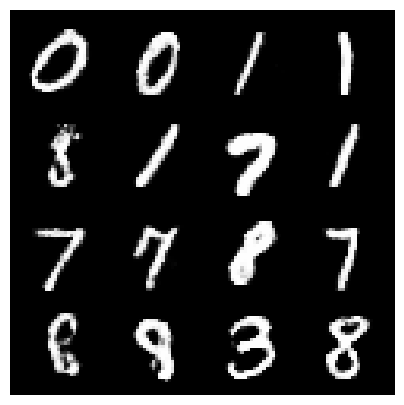

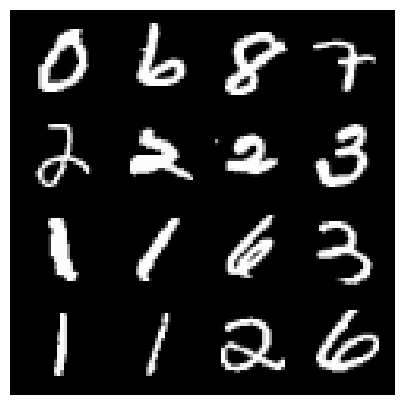

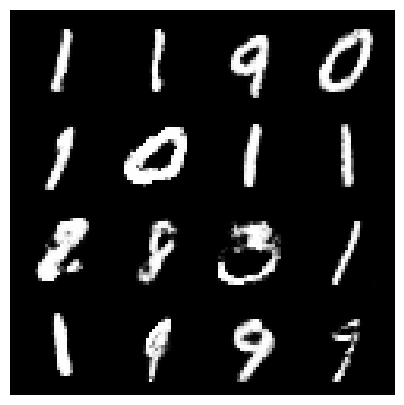

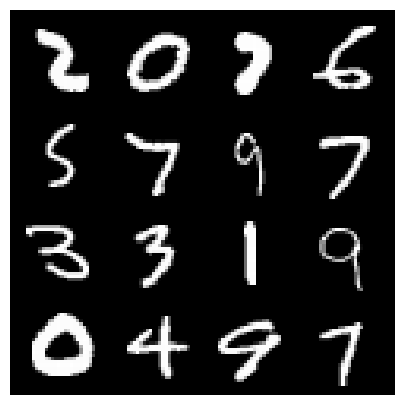

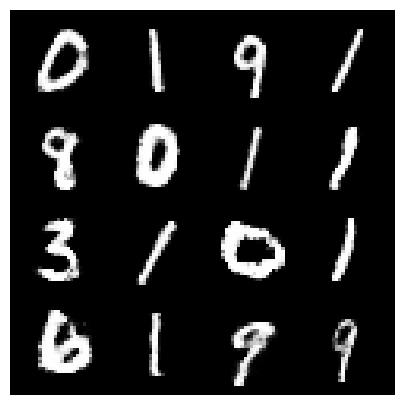

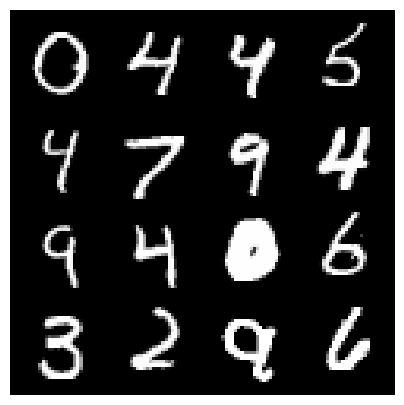

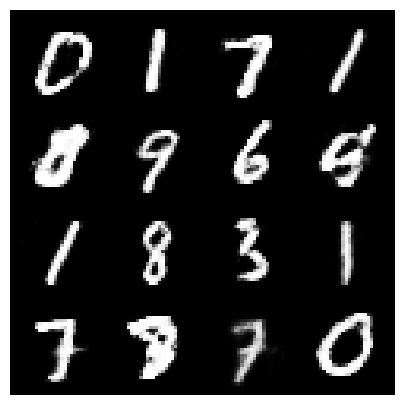

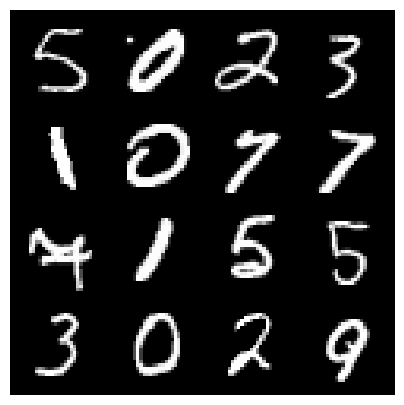

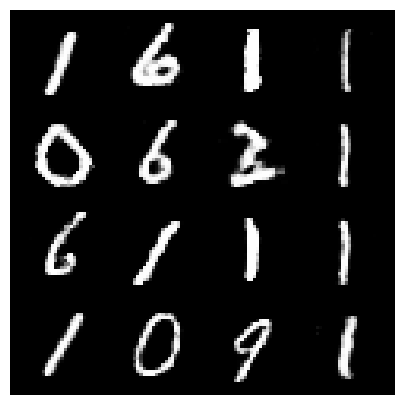

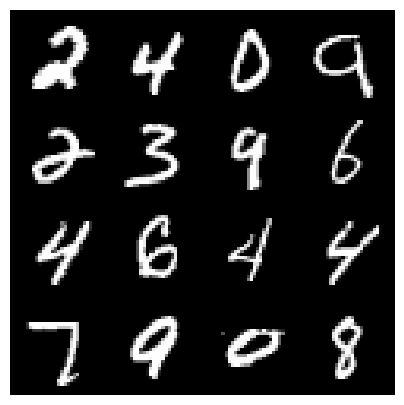

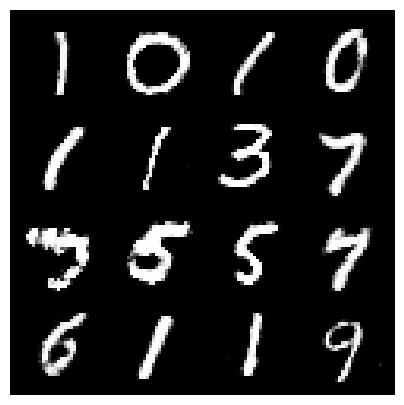

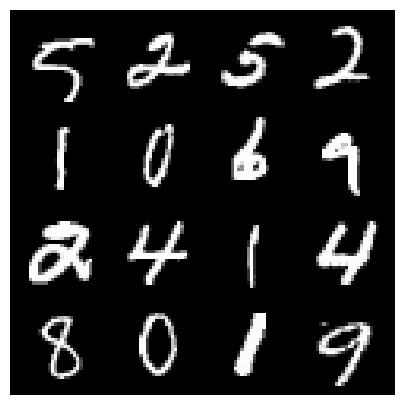

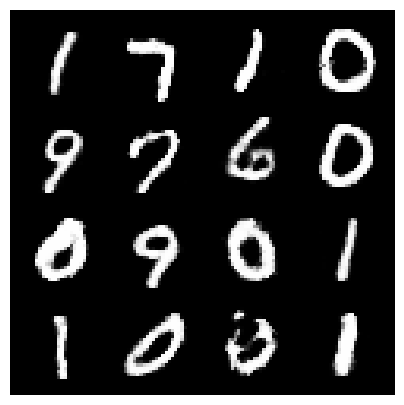

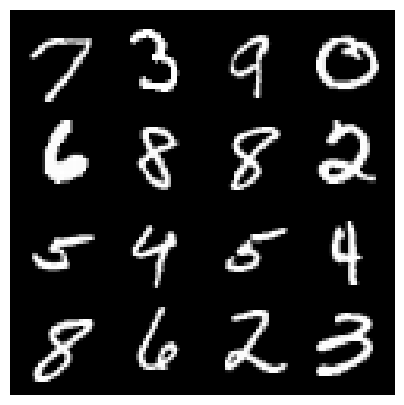

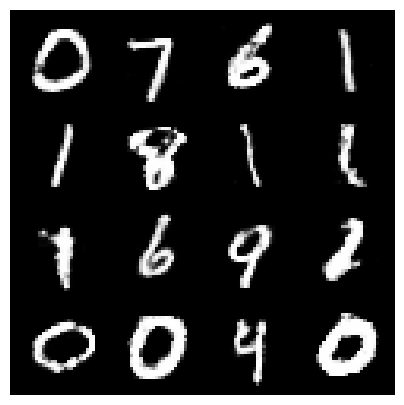

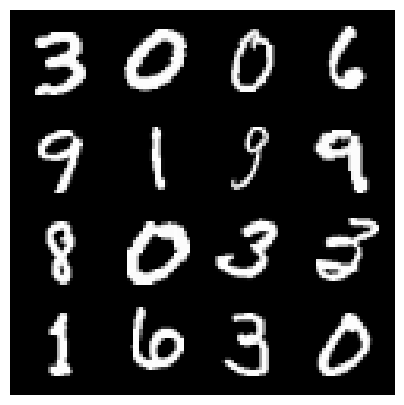

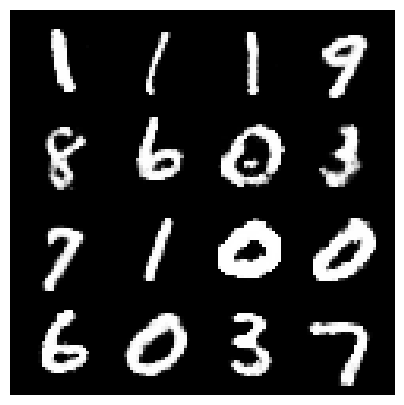

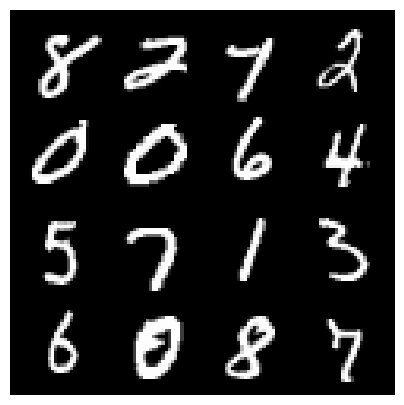

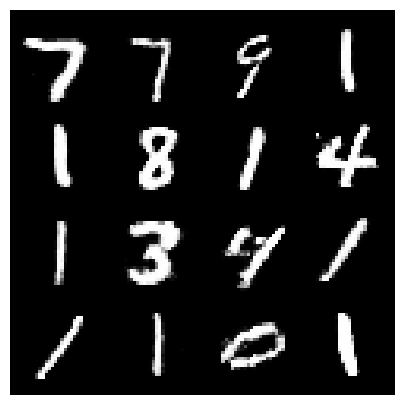

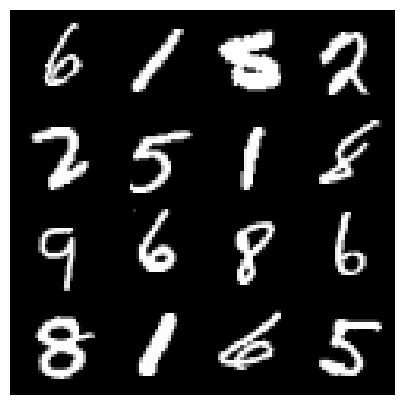

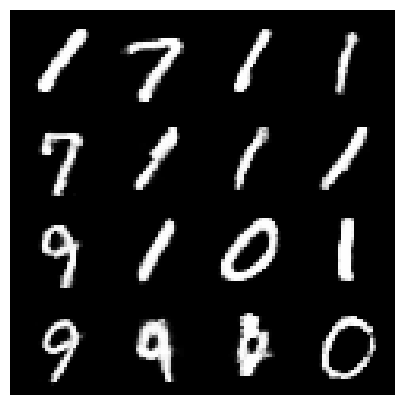

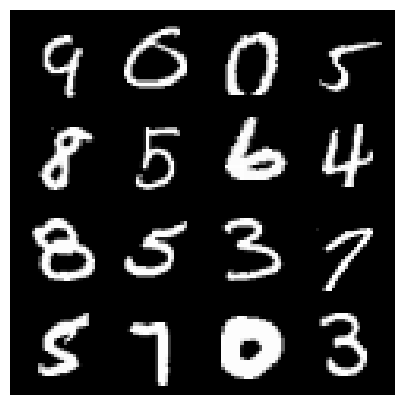

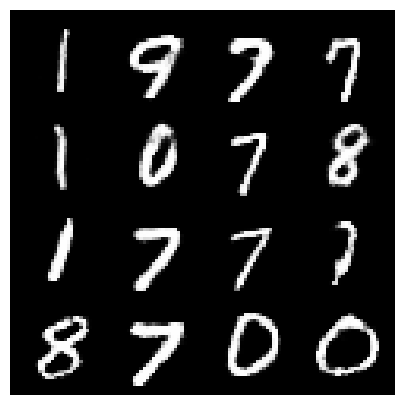

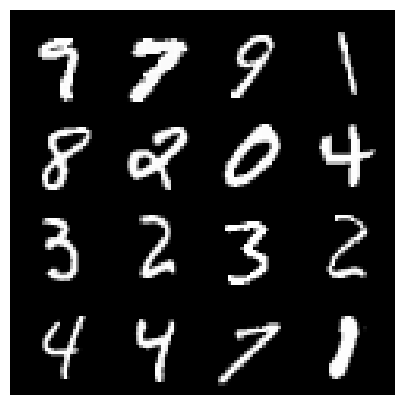

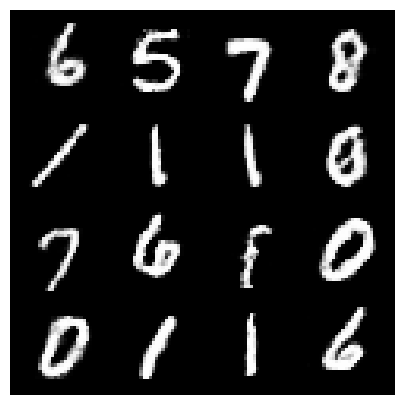

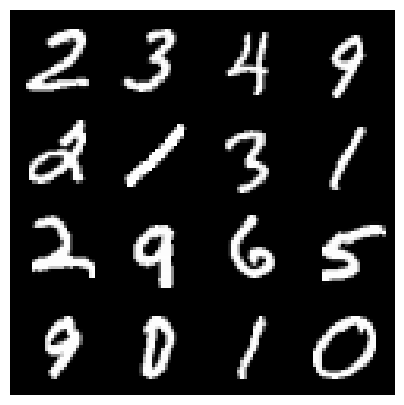

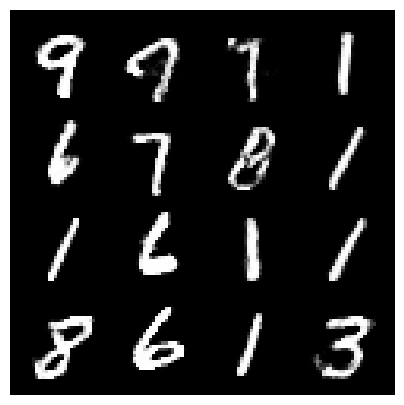

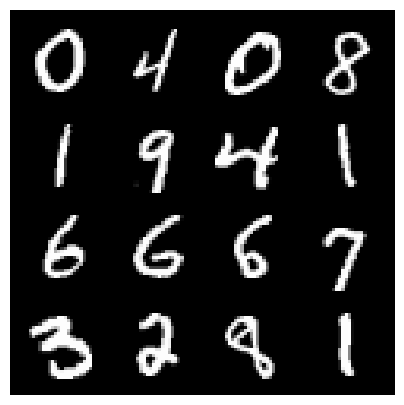

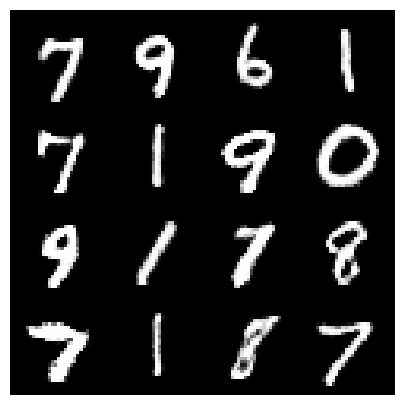

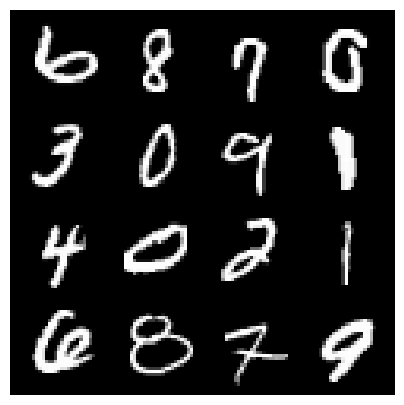

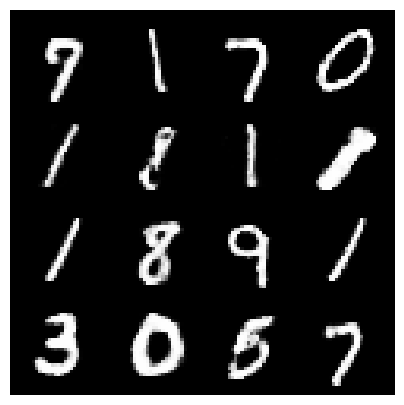

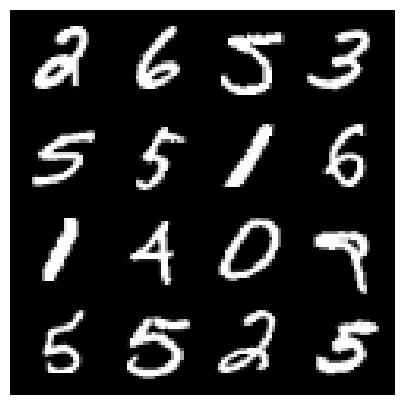

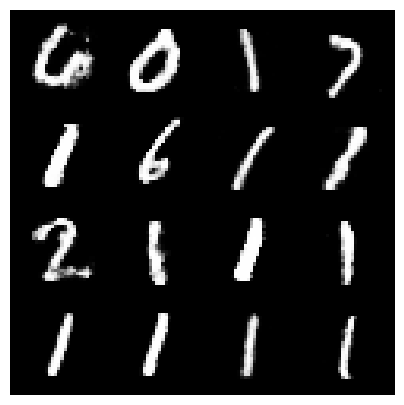

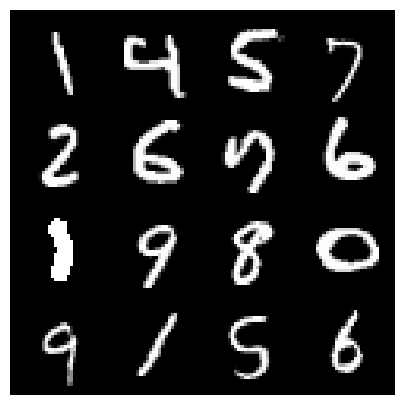

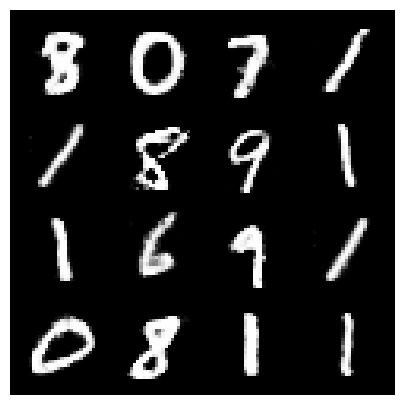

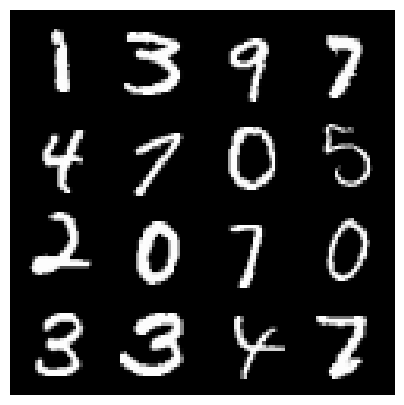

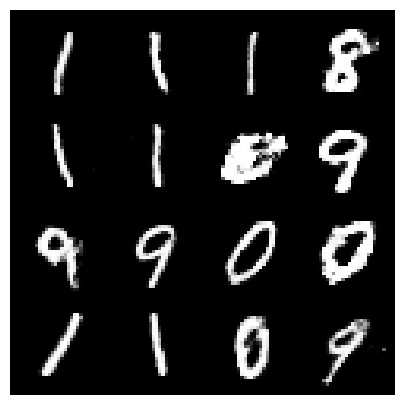

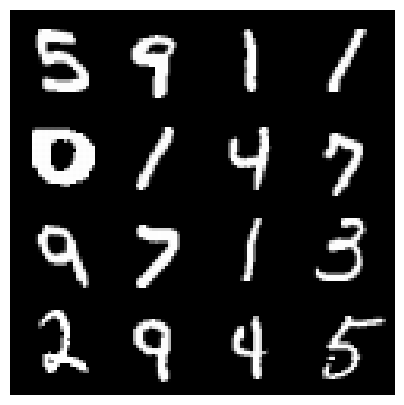

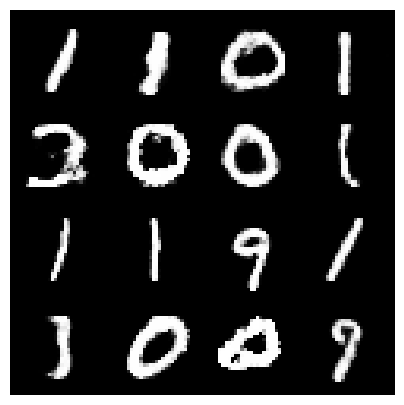

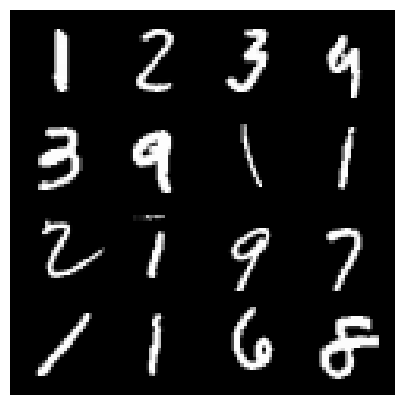

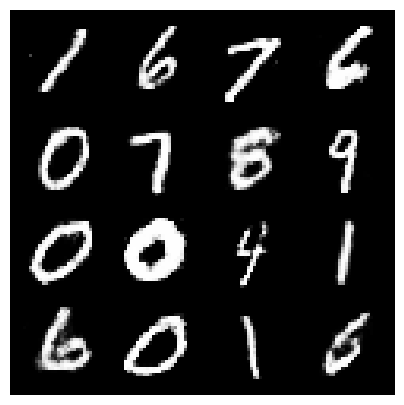

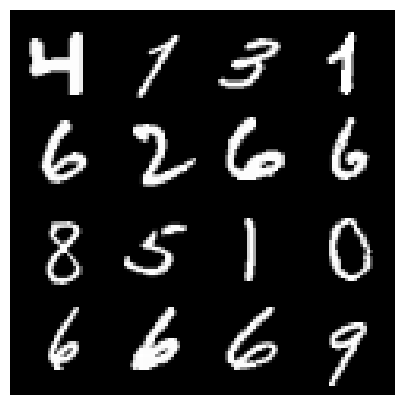

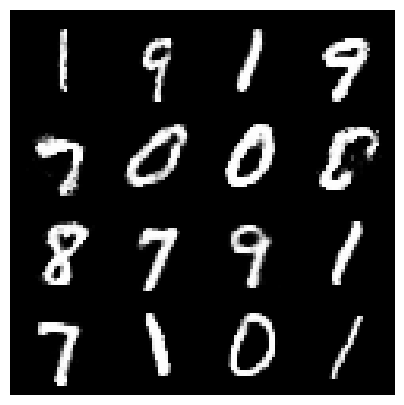

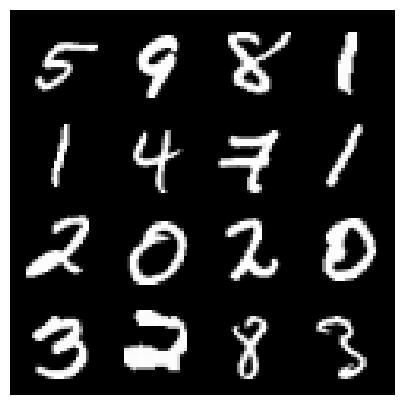

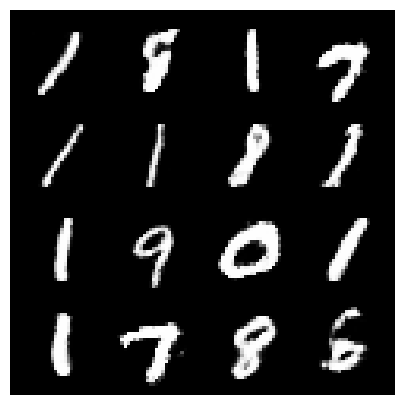

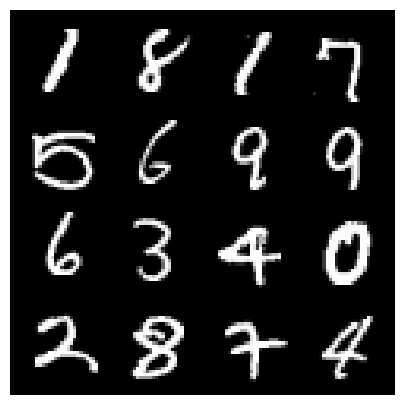

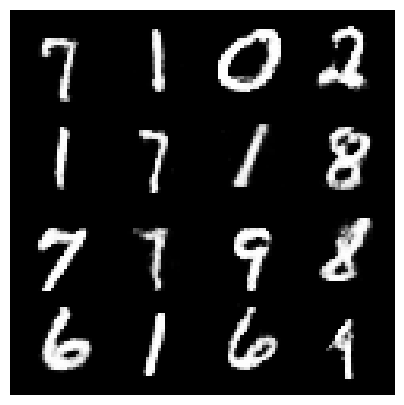

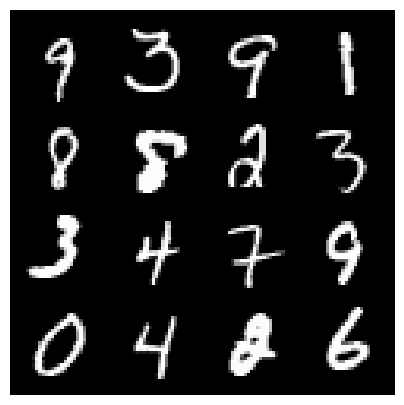

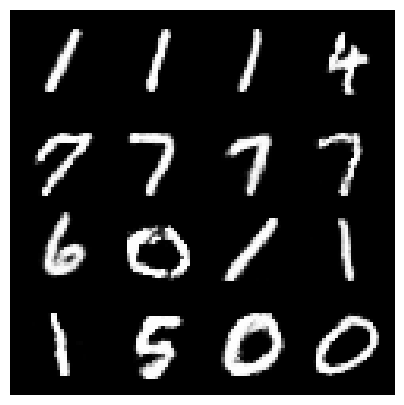

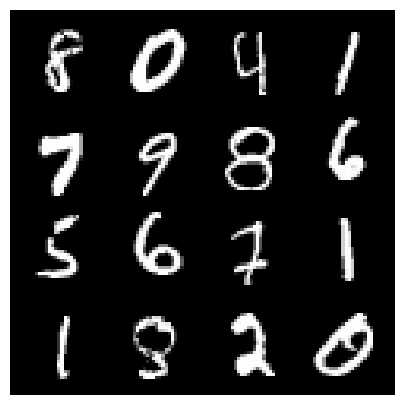

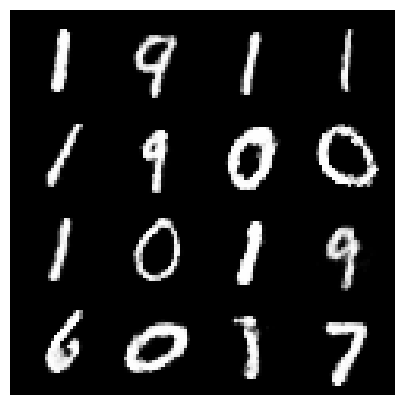

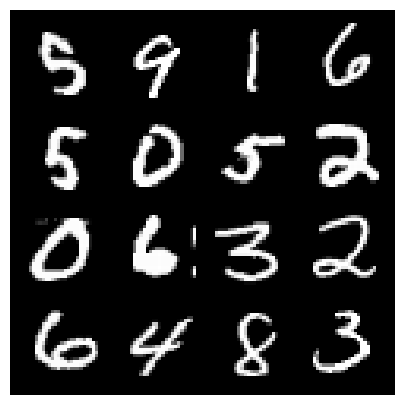

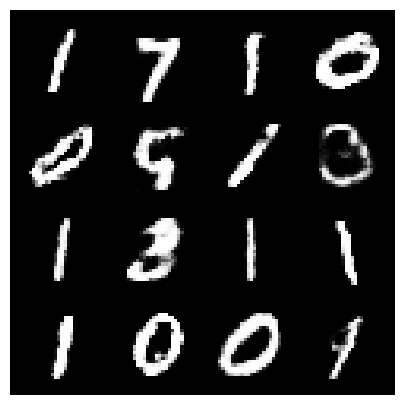

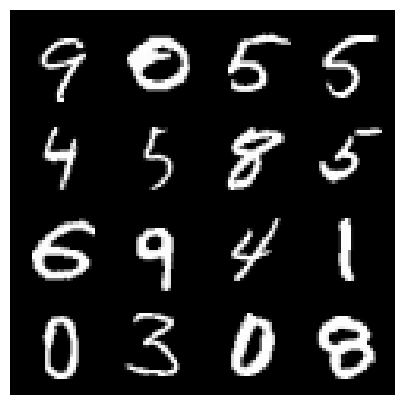

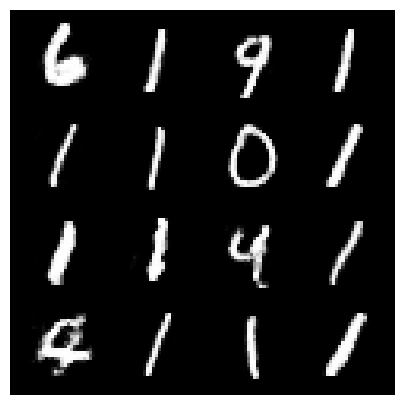

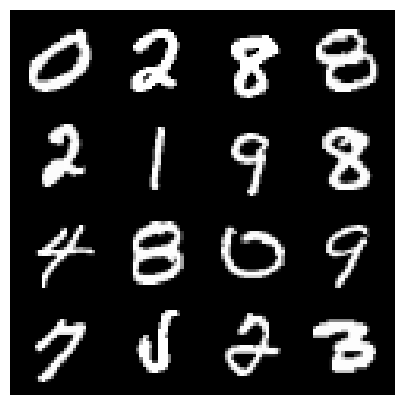

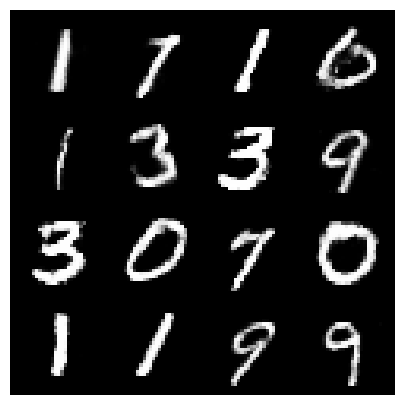

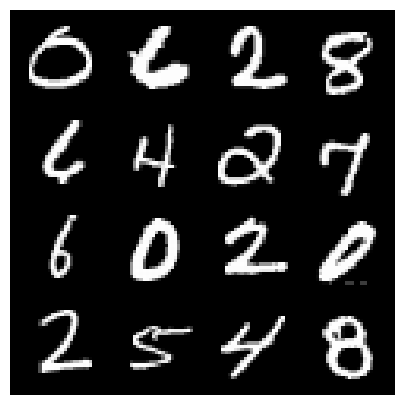

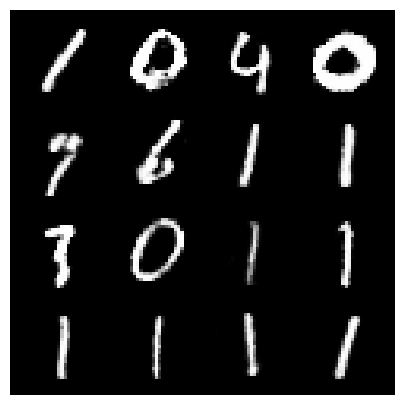

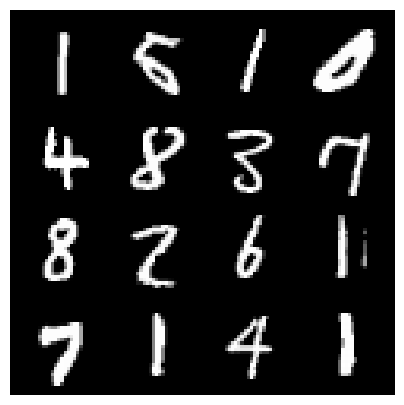

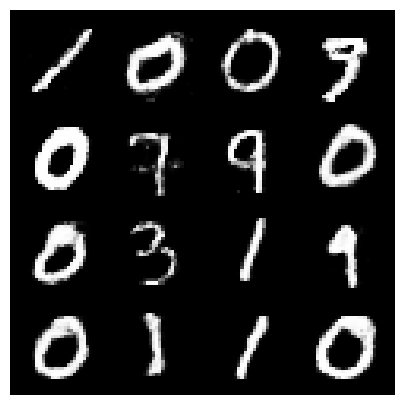

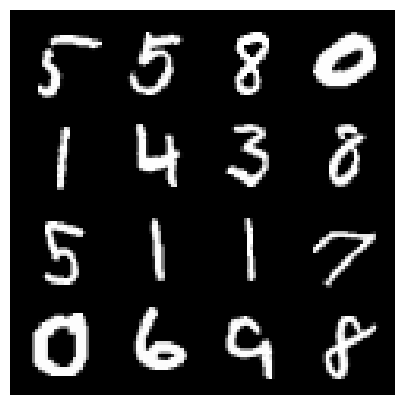

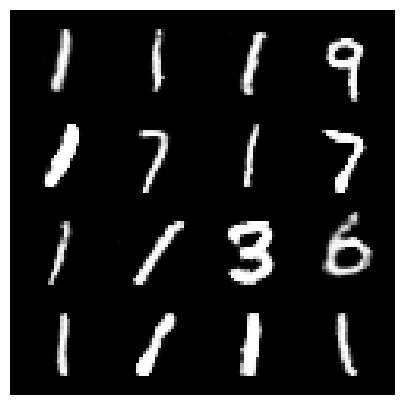

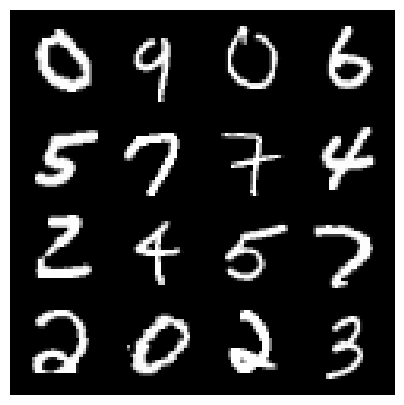

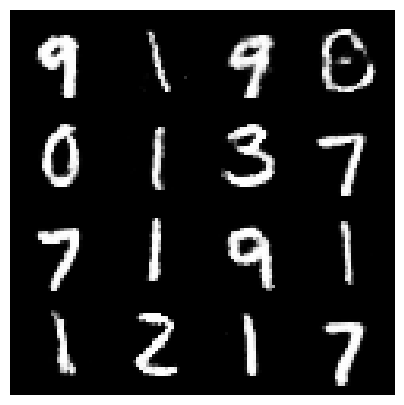

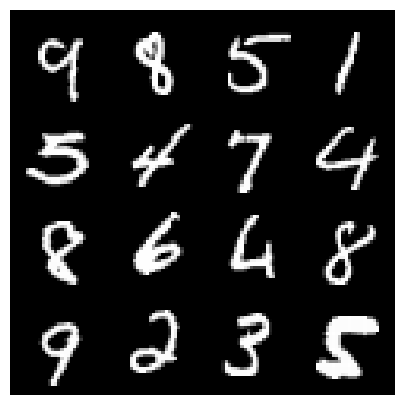

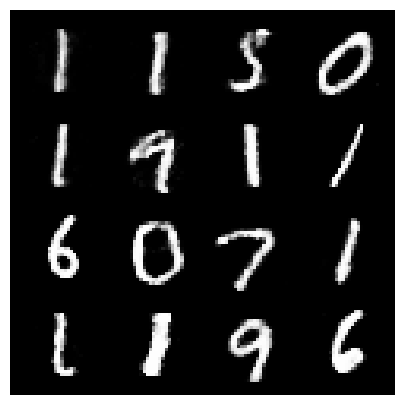

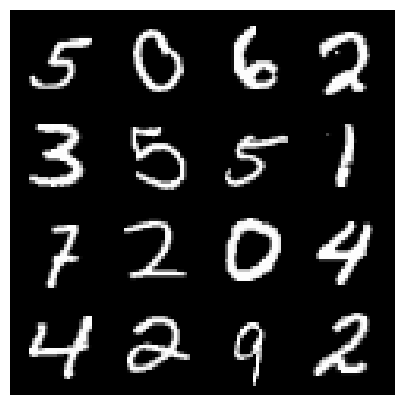

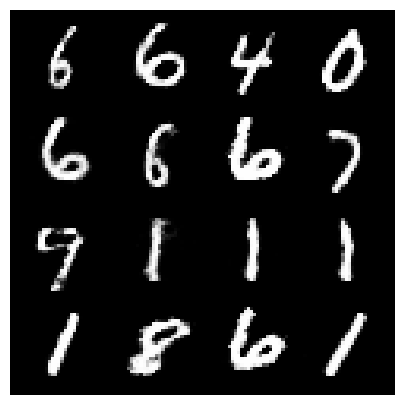

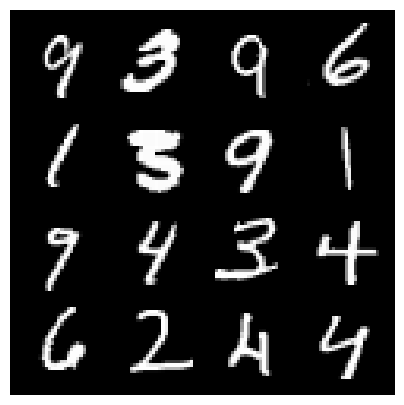

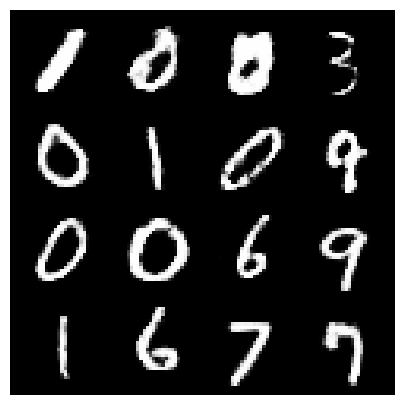

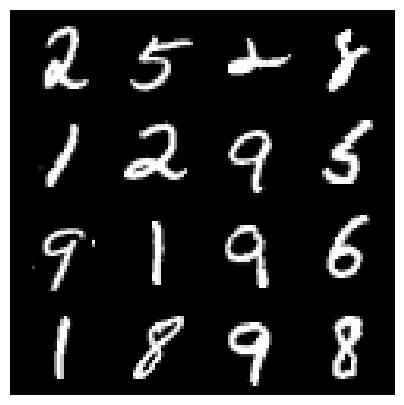

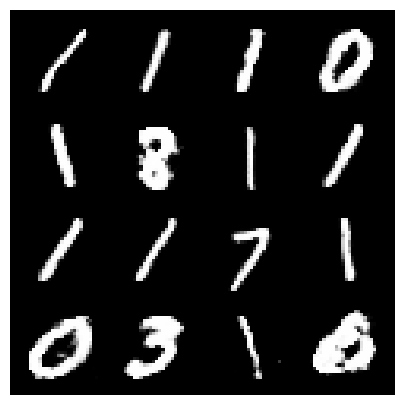

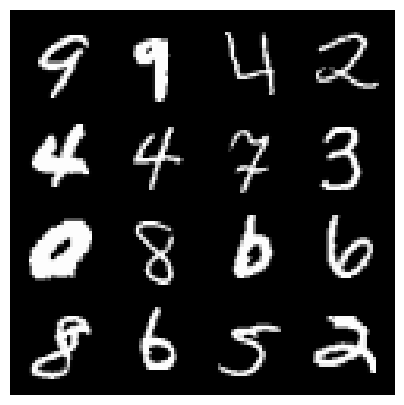

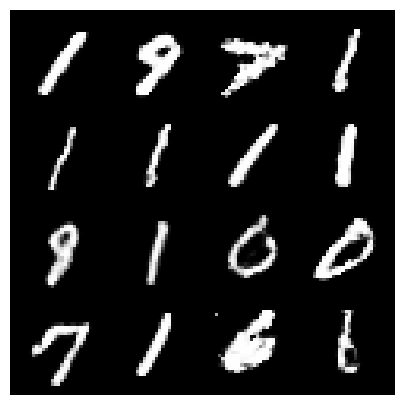

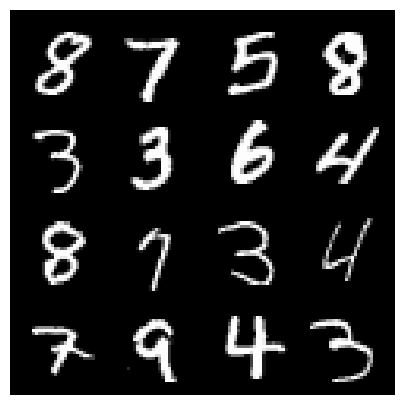

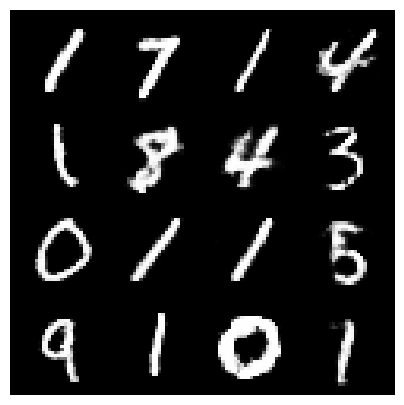

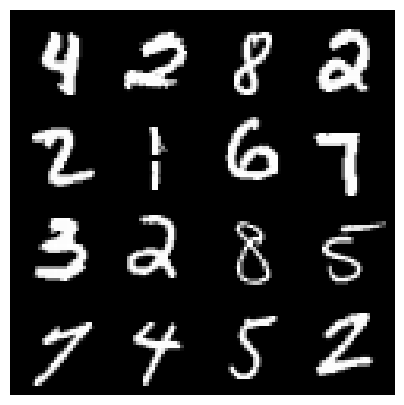

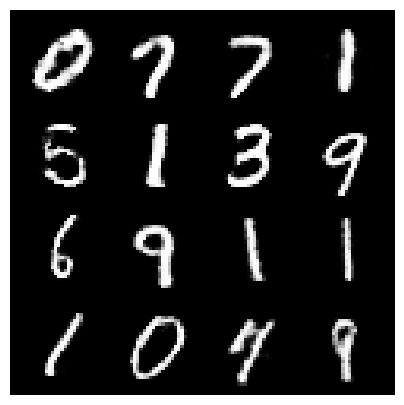

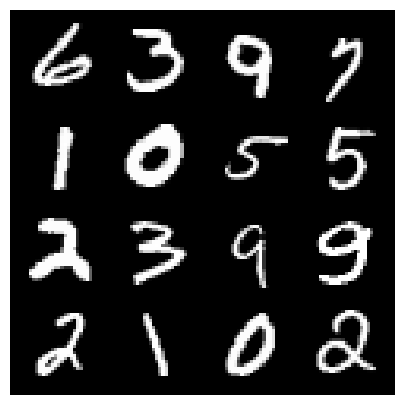

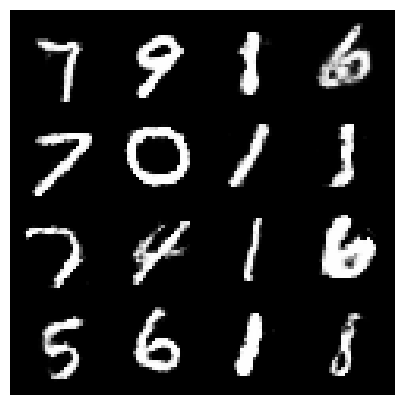

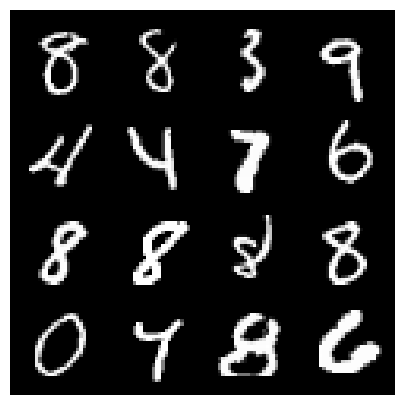

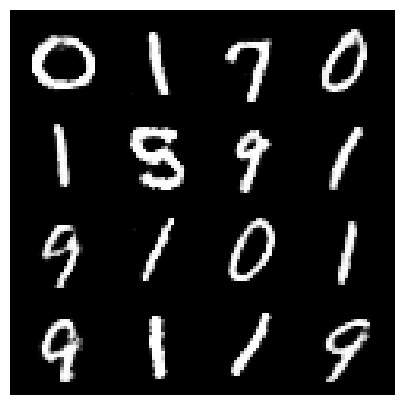

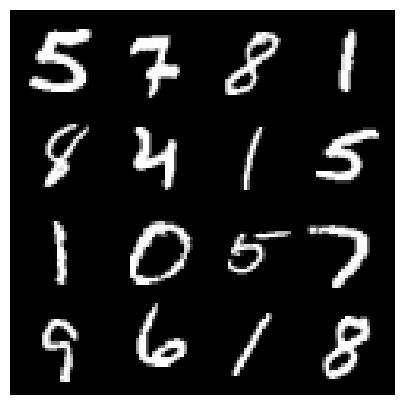

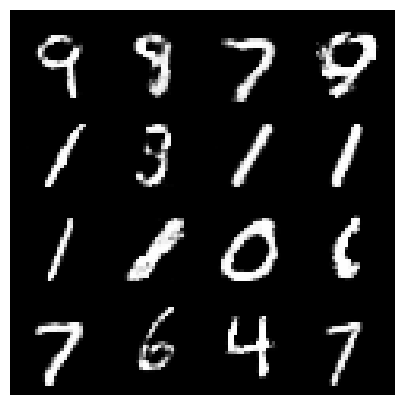

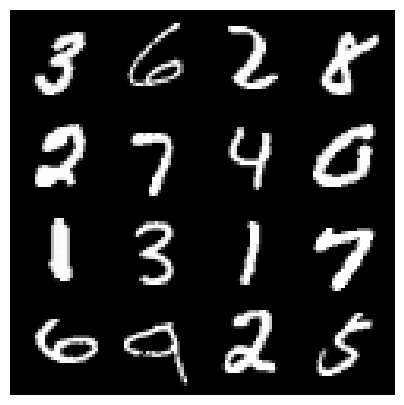

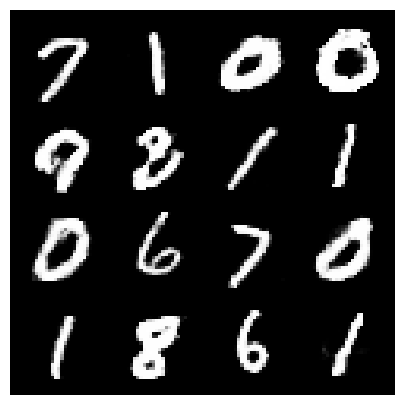

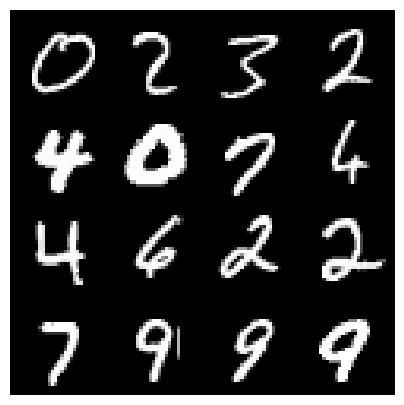

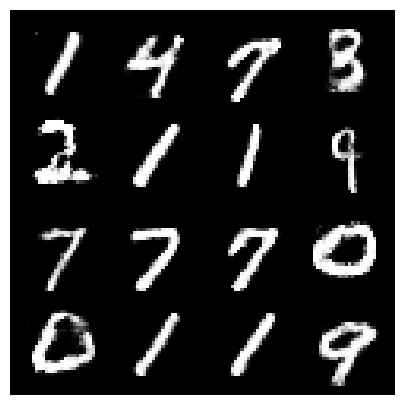

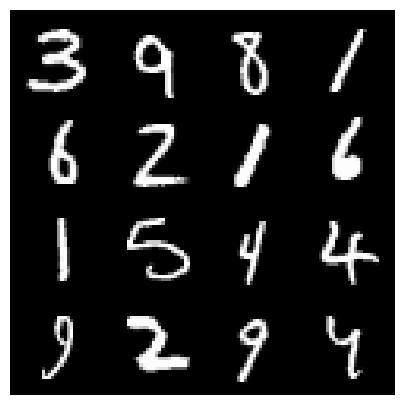

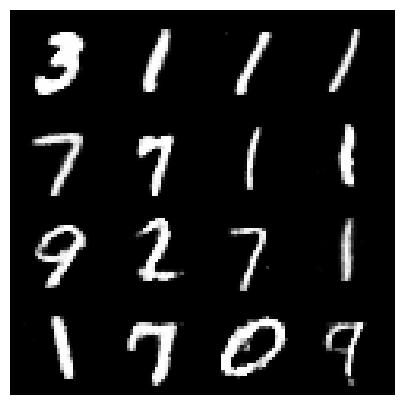

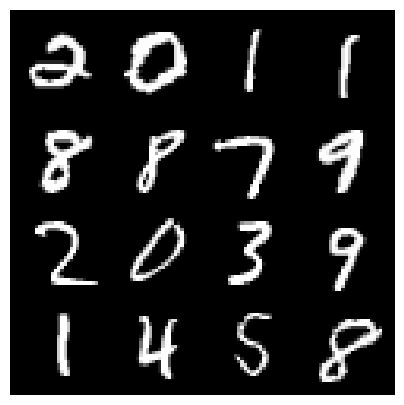

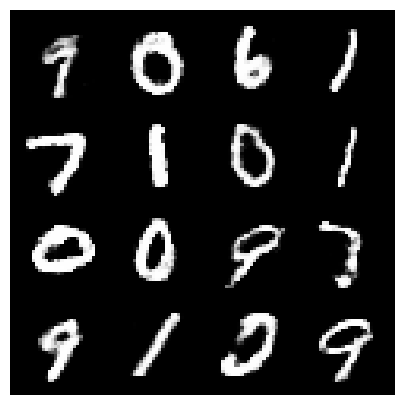

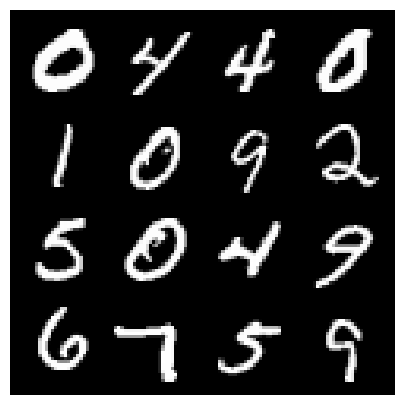

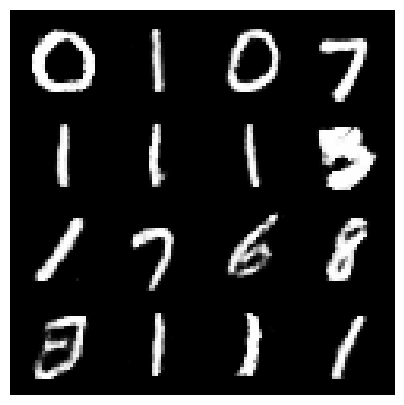

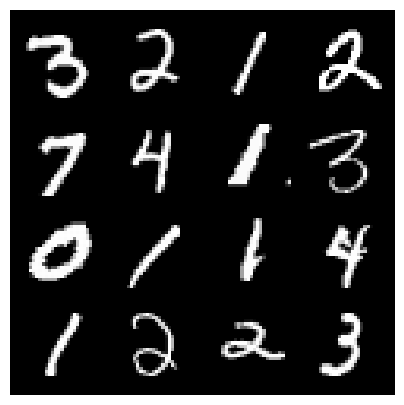

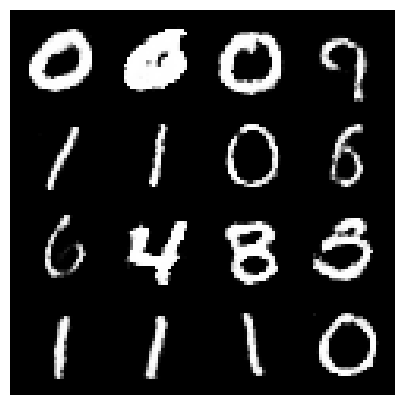

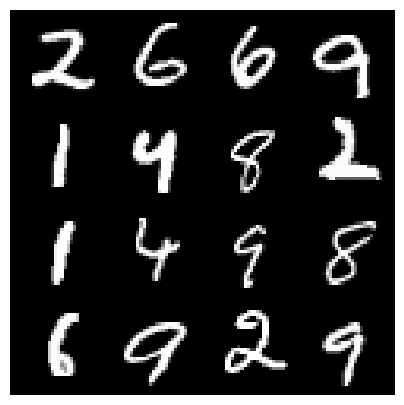

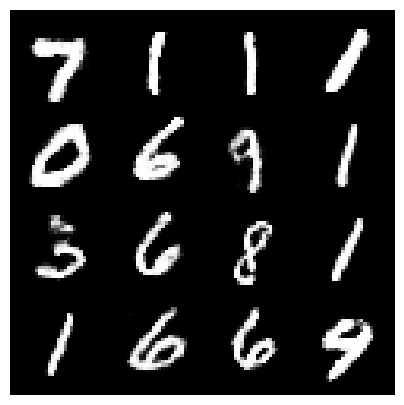

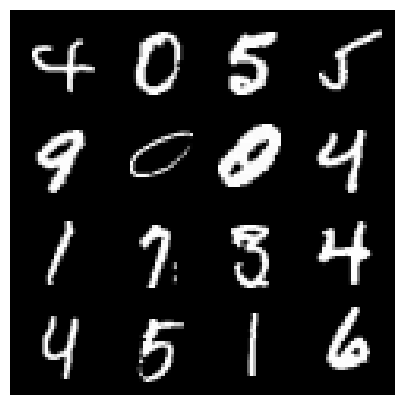

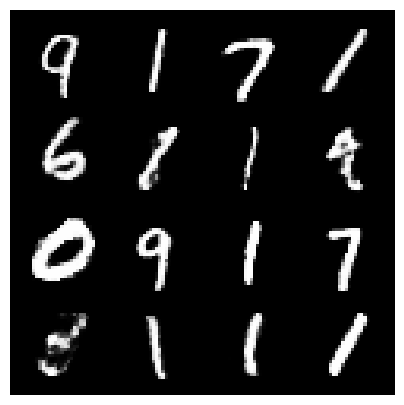

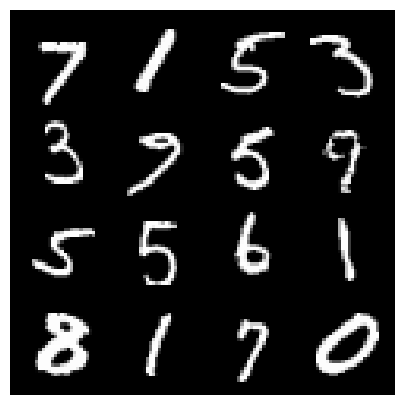

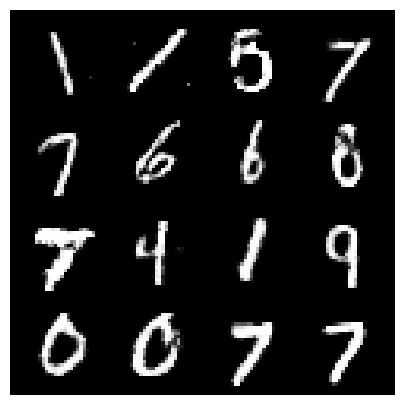

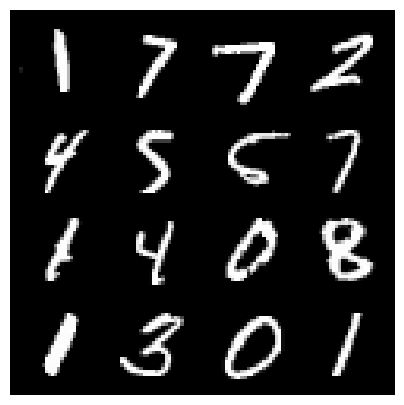

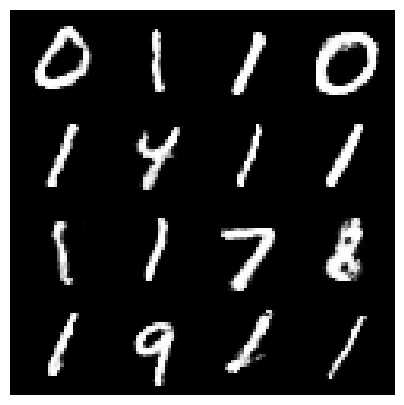

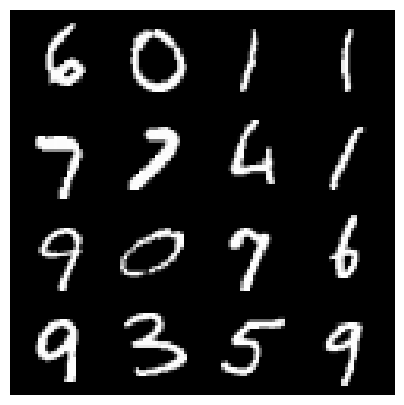

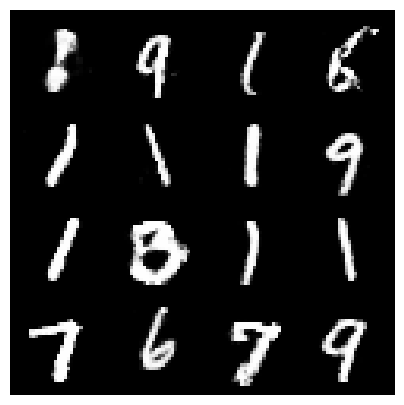

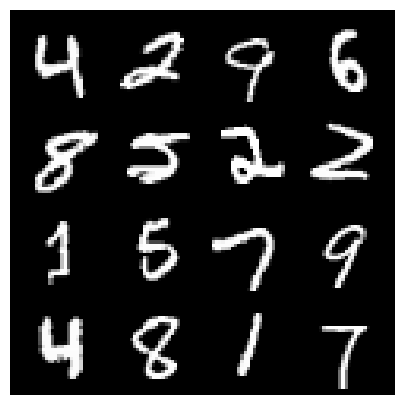

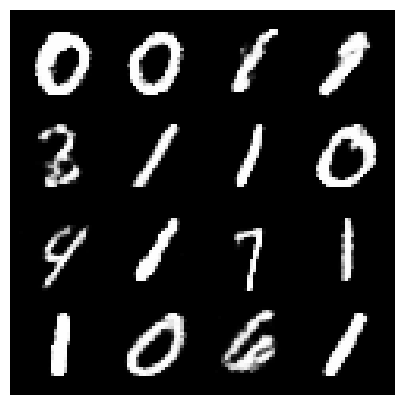

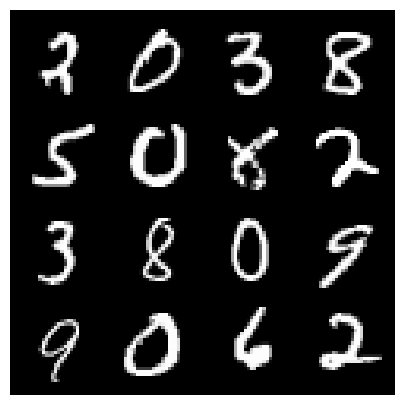

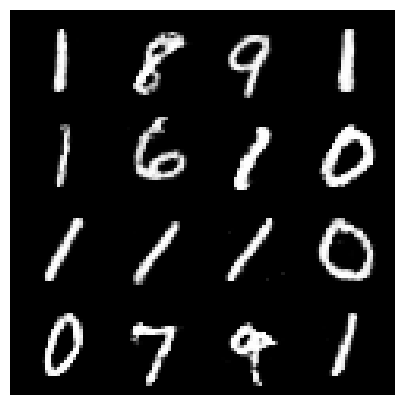

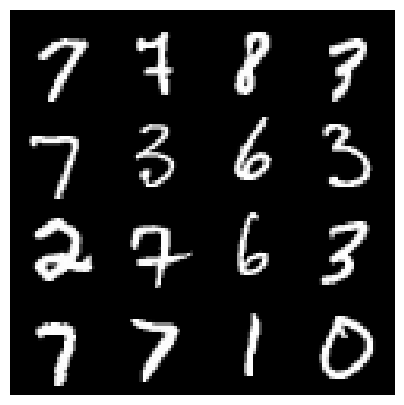

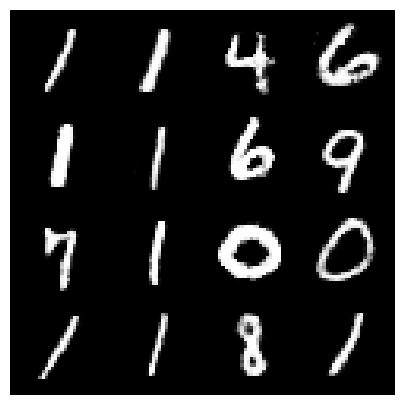

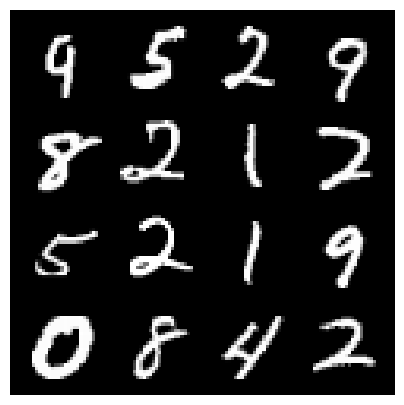

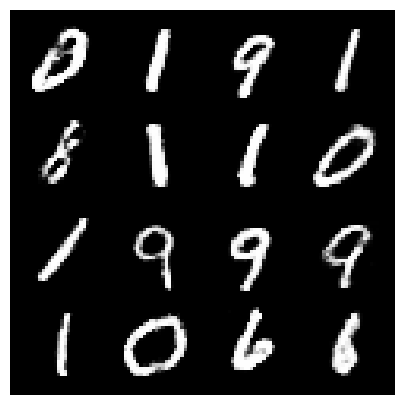

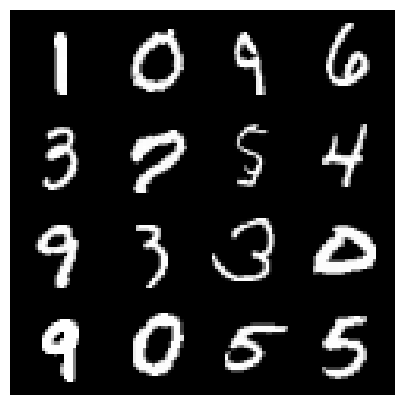

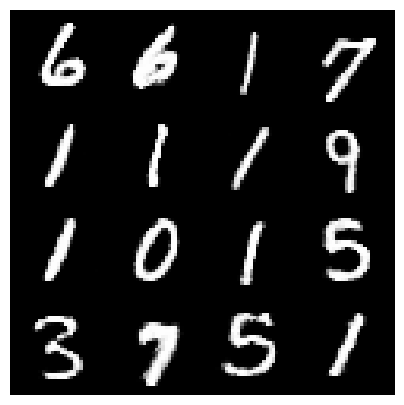

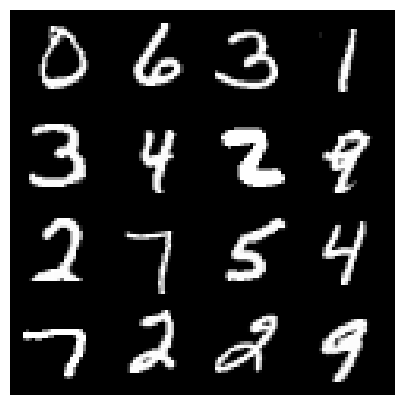

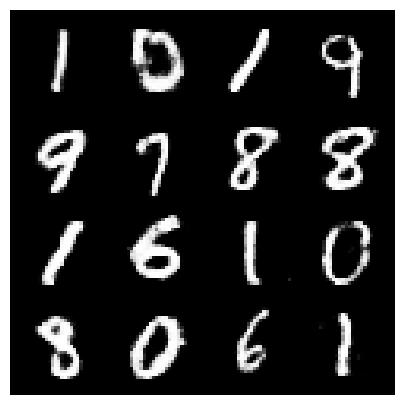

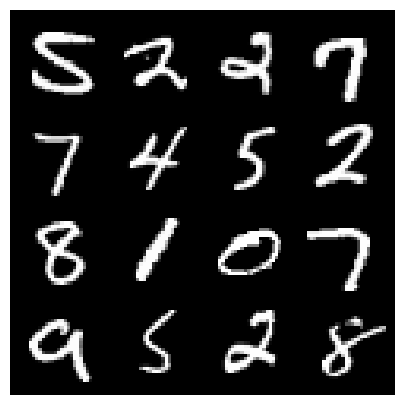

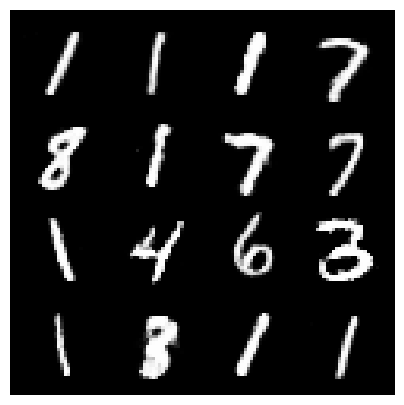

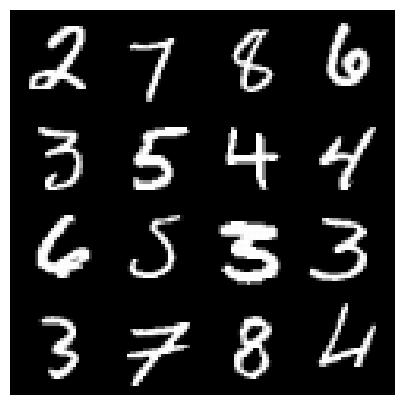

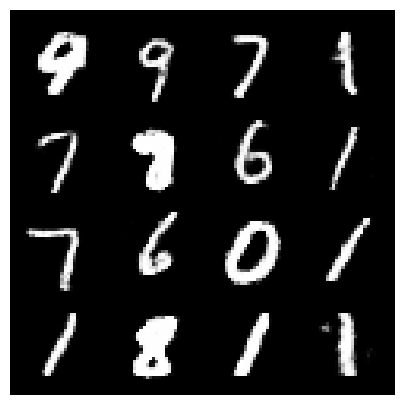

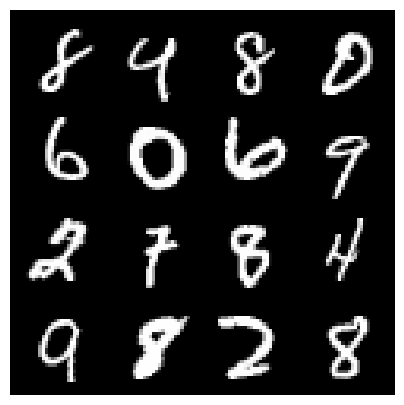

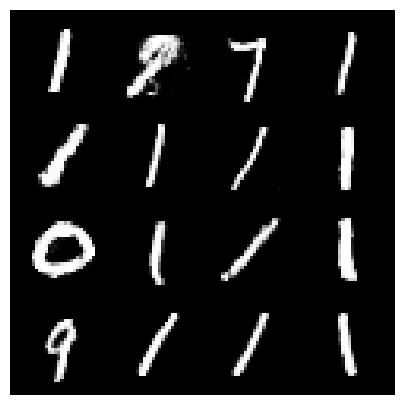

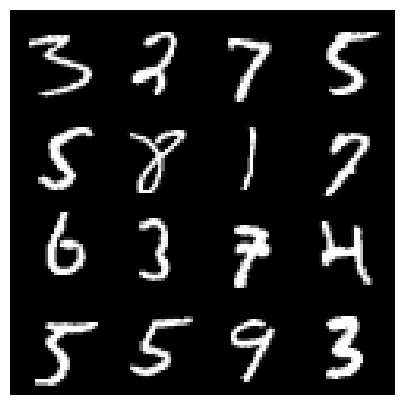

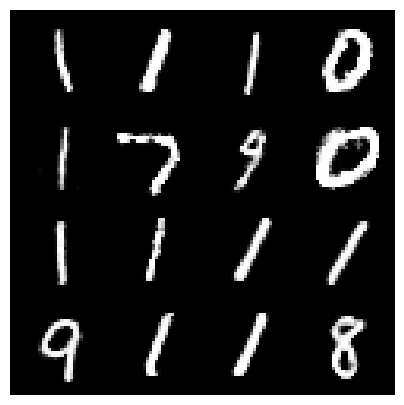

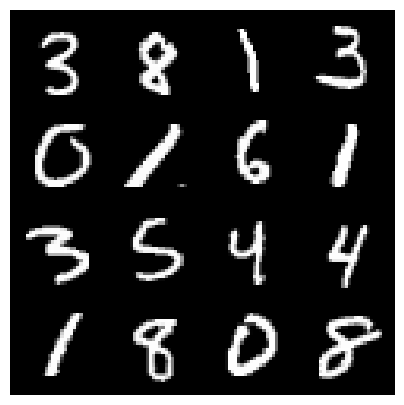

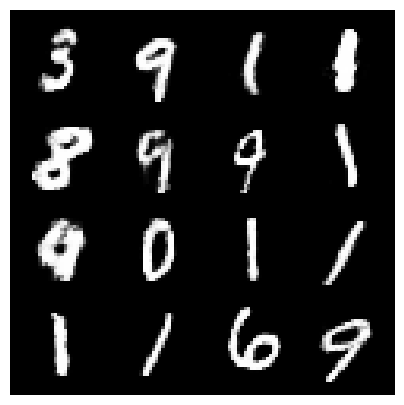

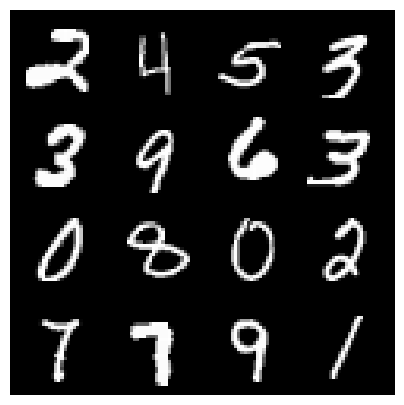

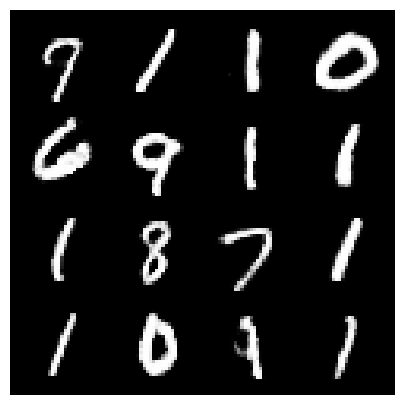

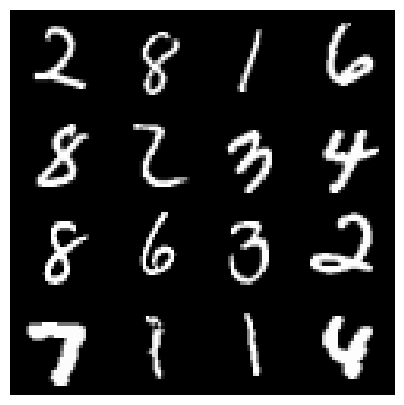

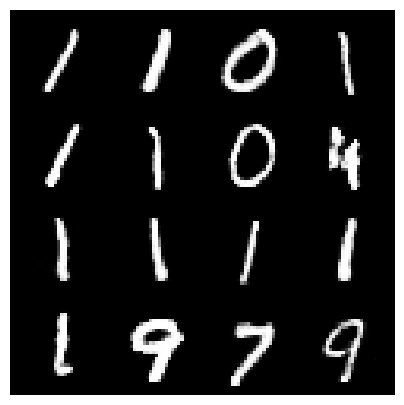

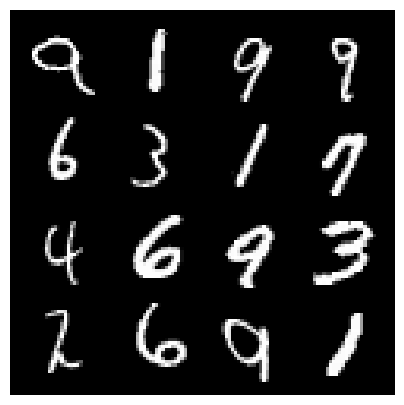

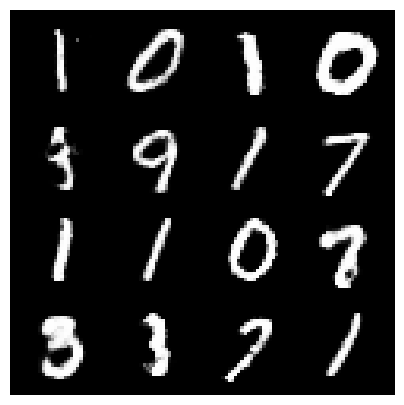

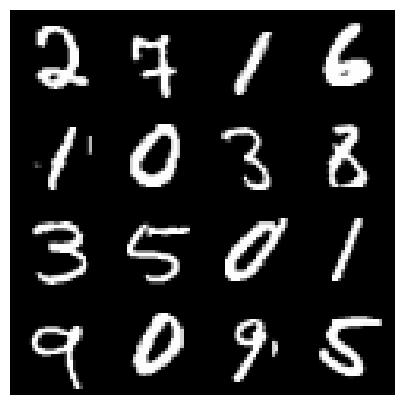

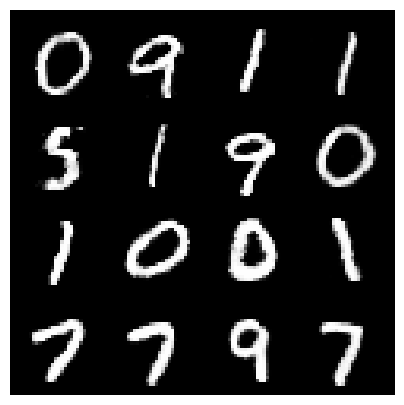

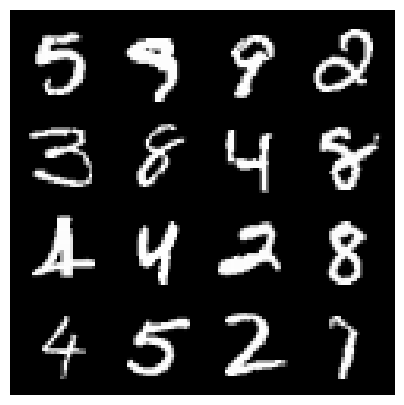

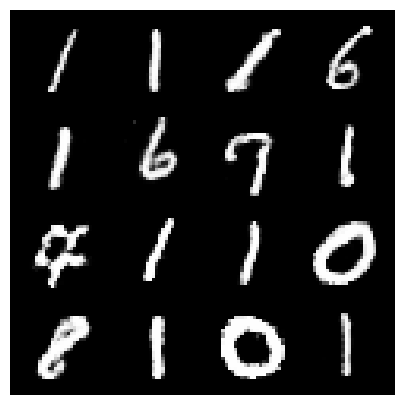

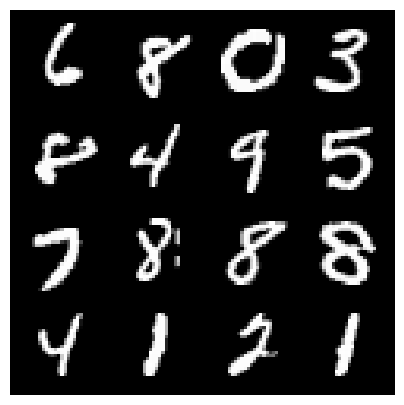

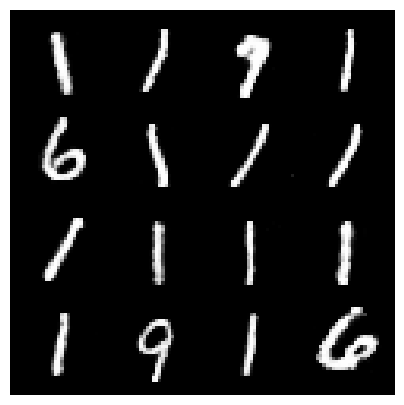

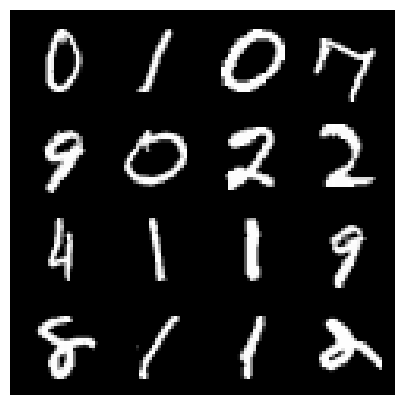

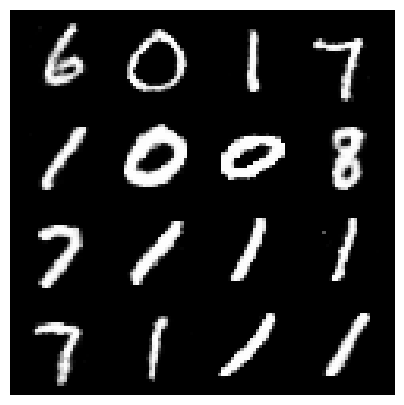

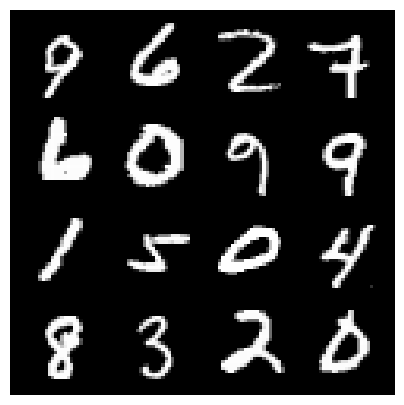

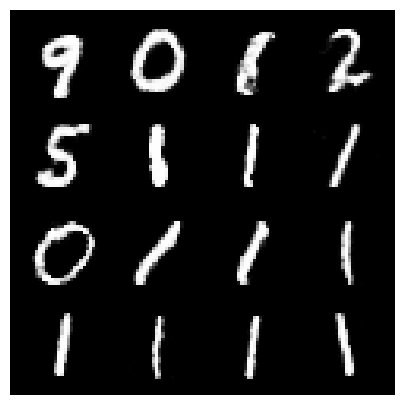

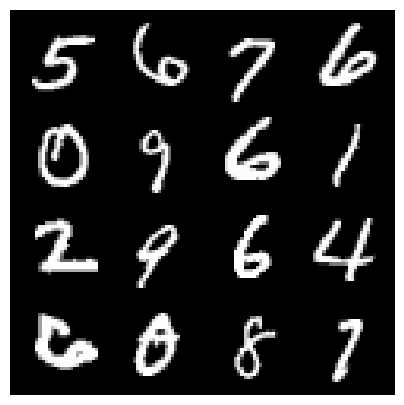

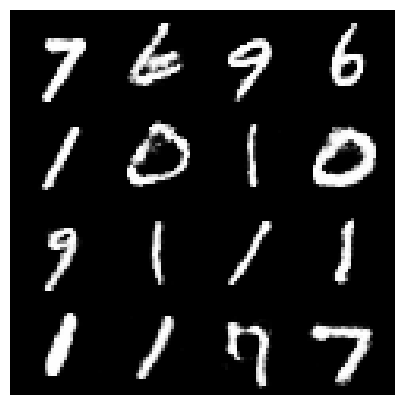

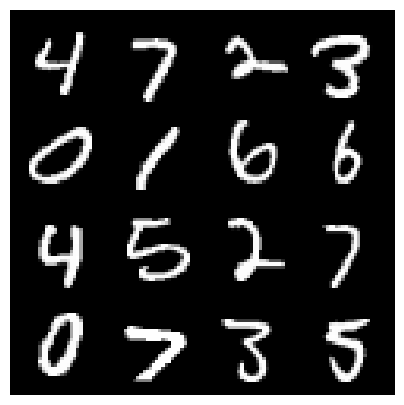

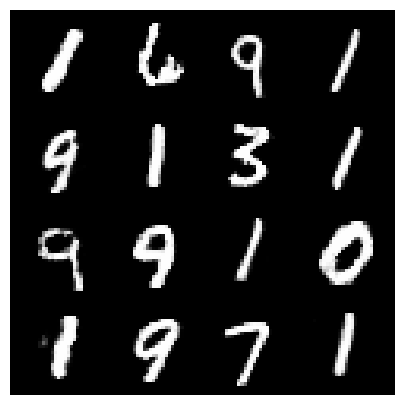

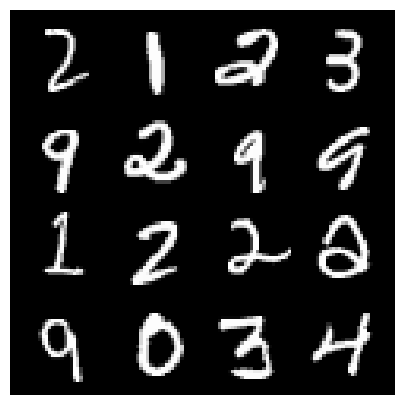

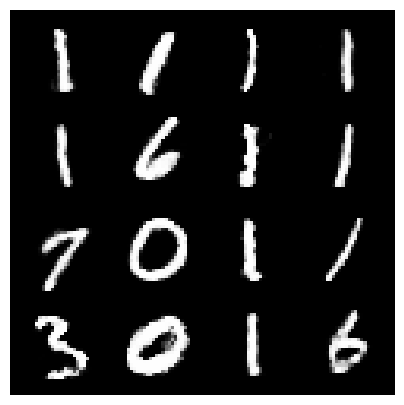

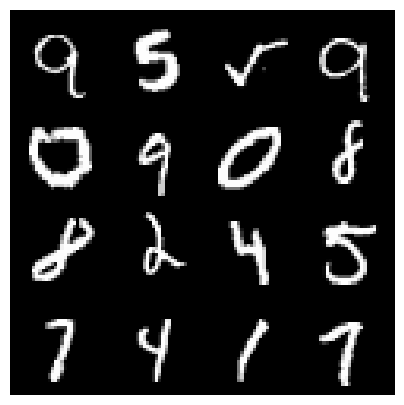

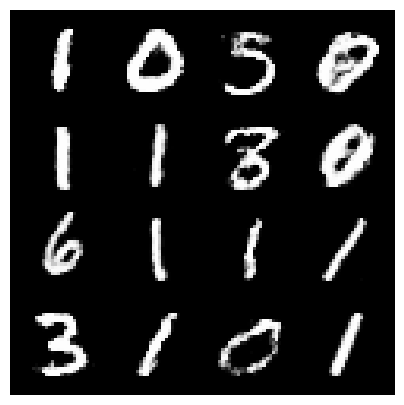

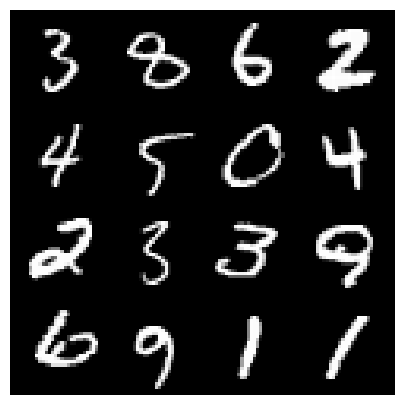

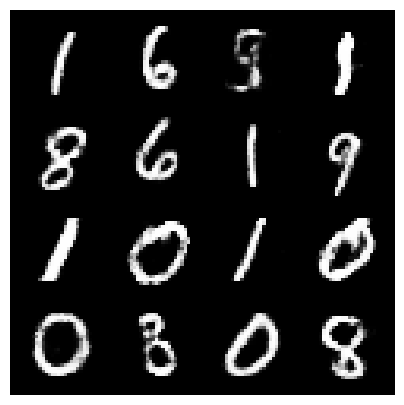

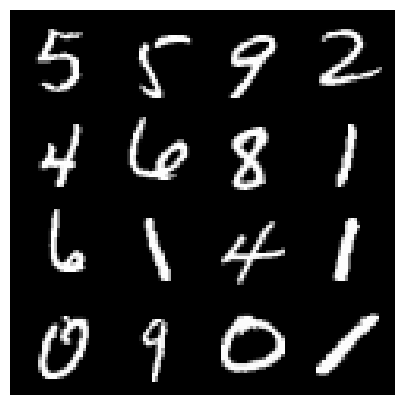

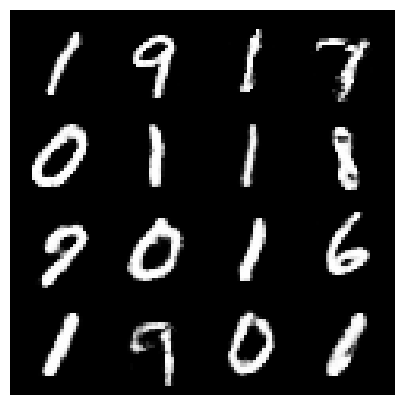

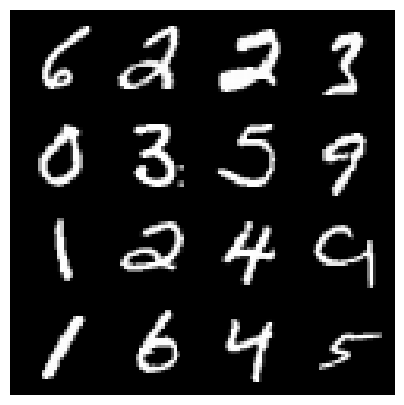

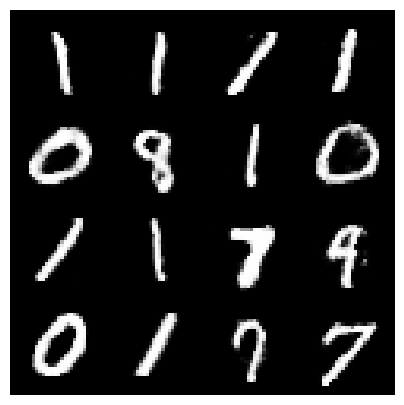

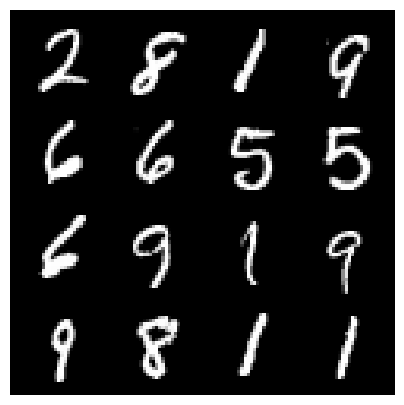

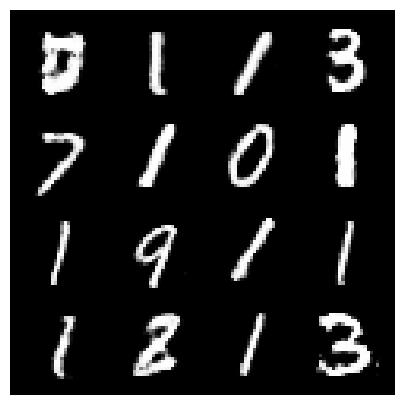

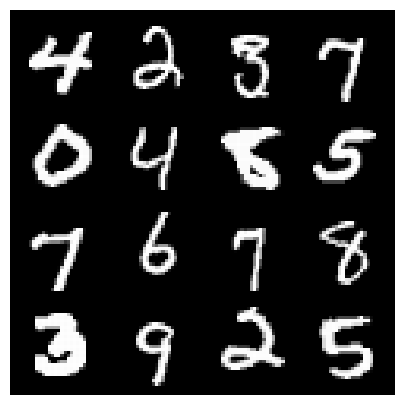

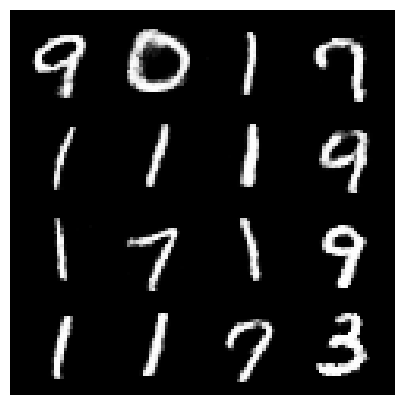

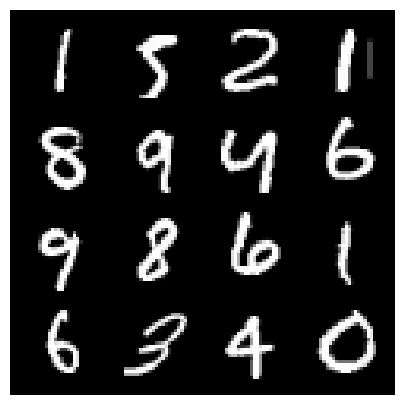

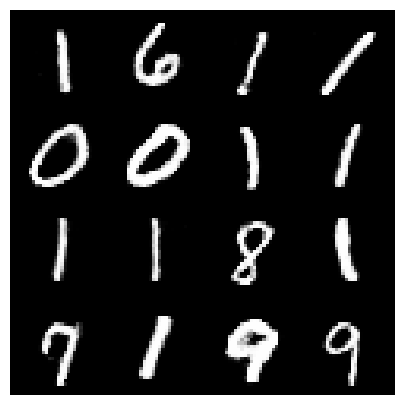

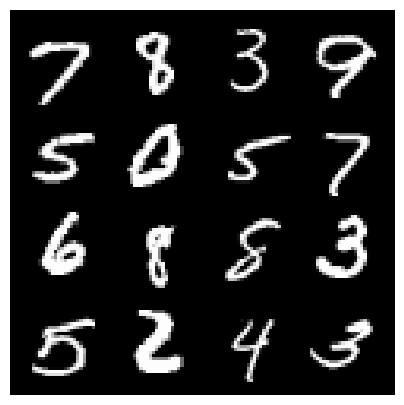

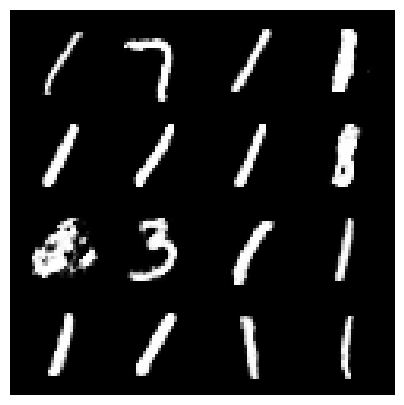

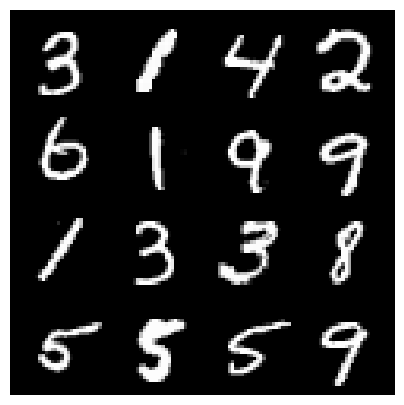

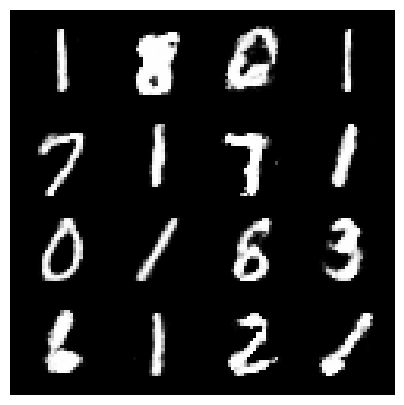

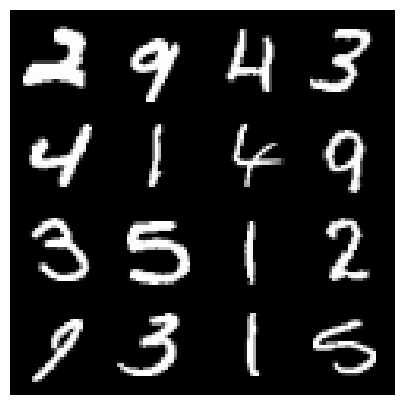

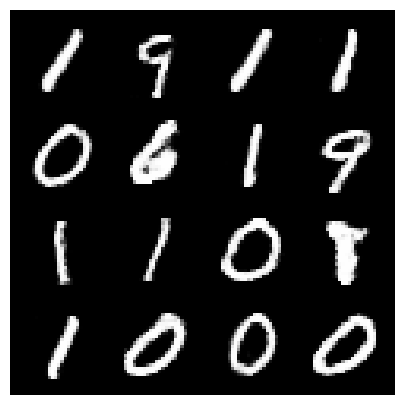

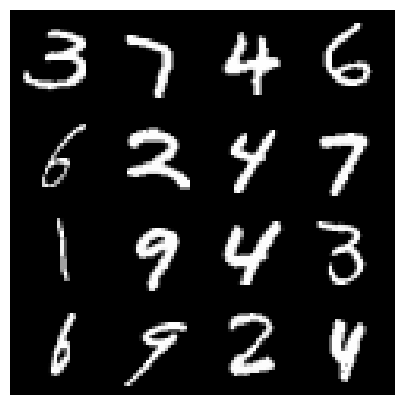

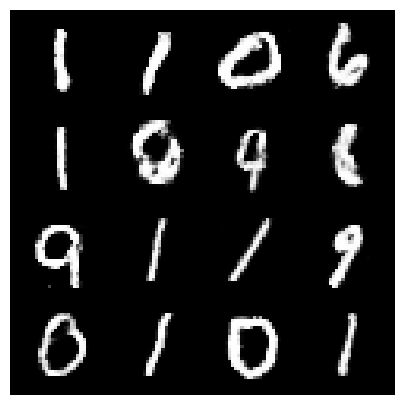

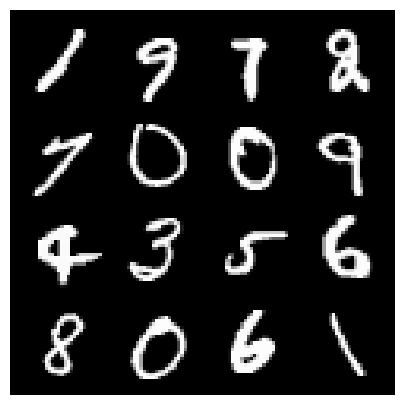

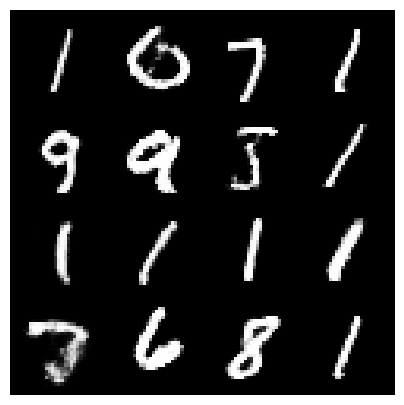

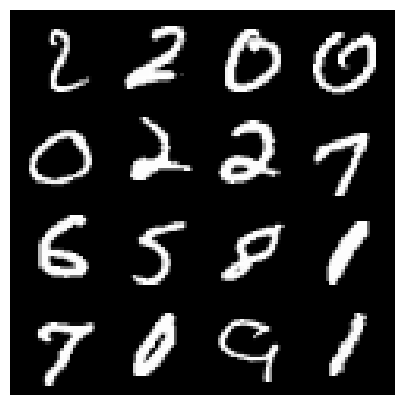

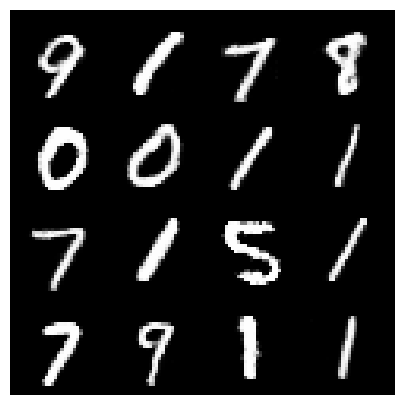

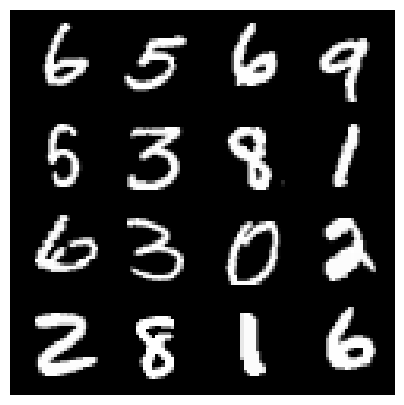

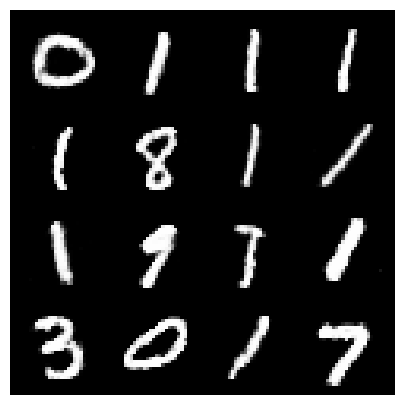

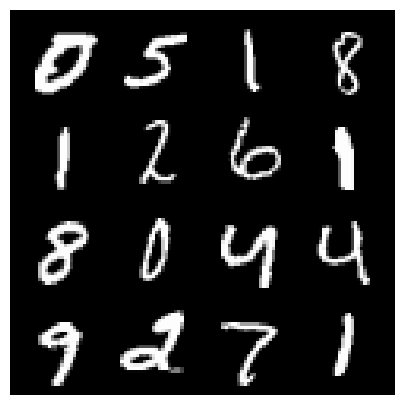

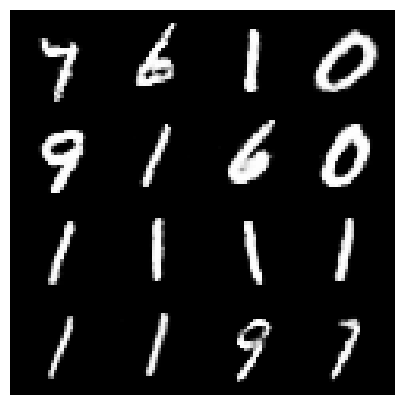

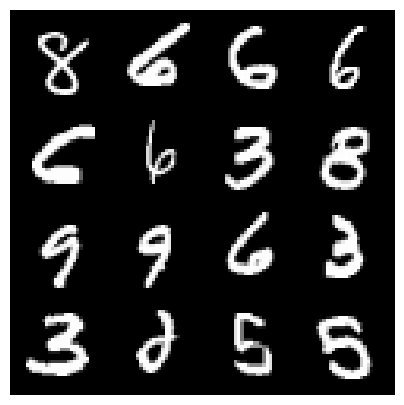

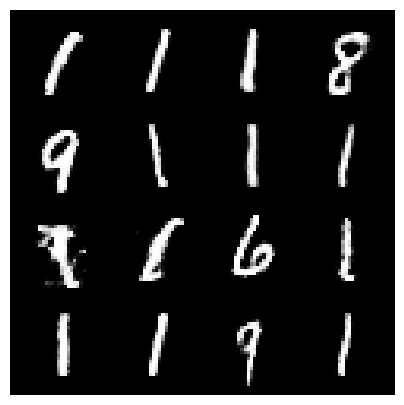

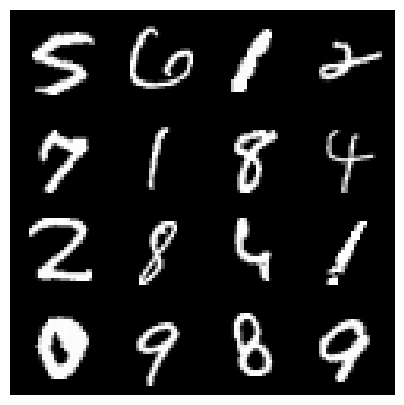

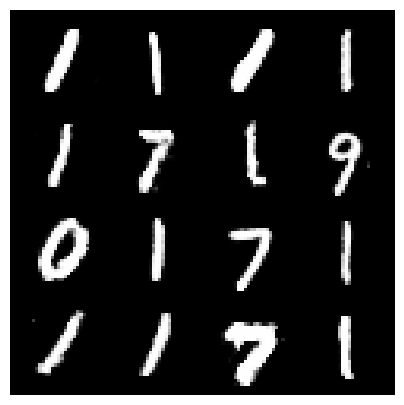

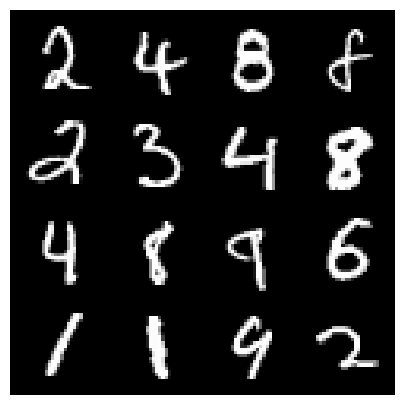

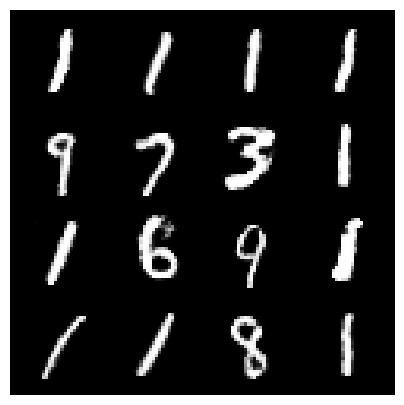

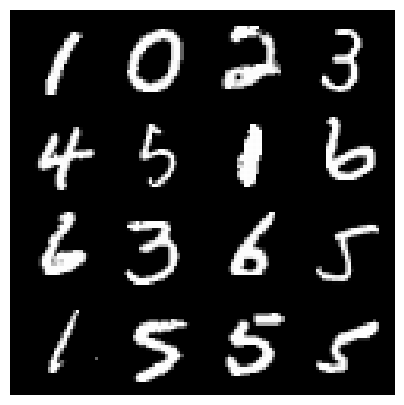

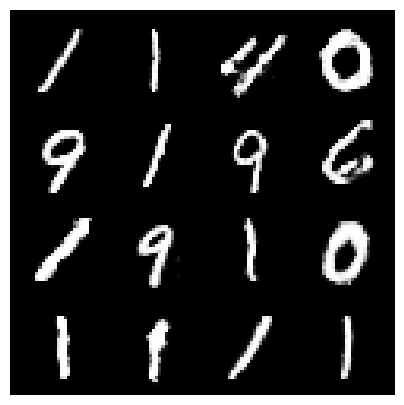

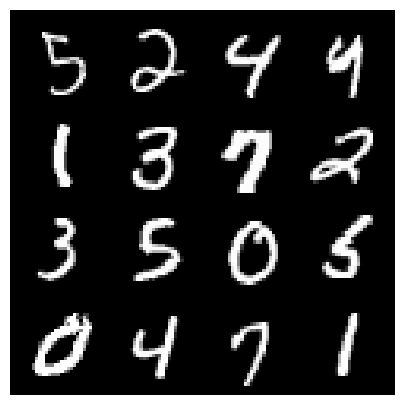

Error in callback <function flush_figures at 0x7cd13aa19b40> (for post_execute):


KeyboardInterrupt: 

In [ ]:
# Training

for epoch in range(epochs):
  for real,_ in tqdm(dataloader):
    ### discriminator
    disc_optim.zero_grad()
    cur_bs = len(real)
    real = real.view(cur_bs,-1)
    real = real.to(device)

    disc_loss = calc_disc_loss(loss_func,gen,disc,cur_bs,real,z_dim)
    disc_loss.backward()
    disc_optim.step()

    ### generator
    gen_optim.zero_grad()
    gen_loss = calc_gen_loss(loss_func,gen,disc,cur_bs,z_dim)
    gen_loss.backward()
    gen_optim.step()

    ### visualization & stats
    mean_disc_loss+=disc_loss.item()/info_step
    mean_gen_loss+=gen_loss.item()/info_step

    if cur_step % info_step == 0 and cur_step >0 :
      fake_noise = gen_noise(cur_bs,z_dim)
      fake = gen(fake_noise)
      show(fake)
      show(real)
      print(f"Epoch: {epoch}| step: {cur_step} Gen Loss : {mean_gen_loss} | Disc Loss : {mean_disc_loss}")
      mean_gen_loss,mean_disc_loss = 0,0

    cur_step+=1

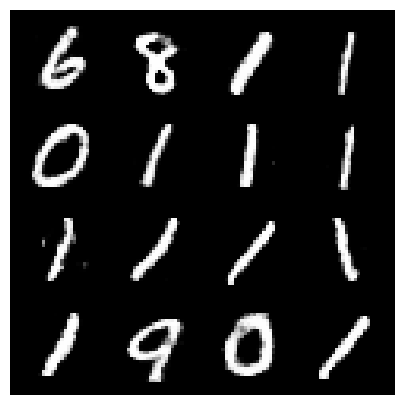

In [ ]:
fake_noise = gen_noise(cur_bs,z_dim)
fake = gen(fake_noise)
show(fake,num=16)